# Marketing Analytics Project: A/B Test of Advertisement on Purchase Rates

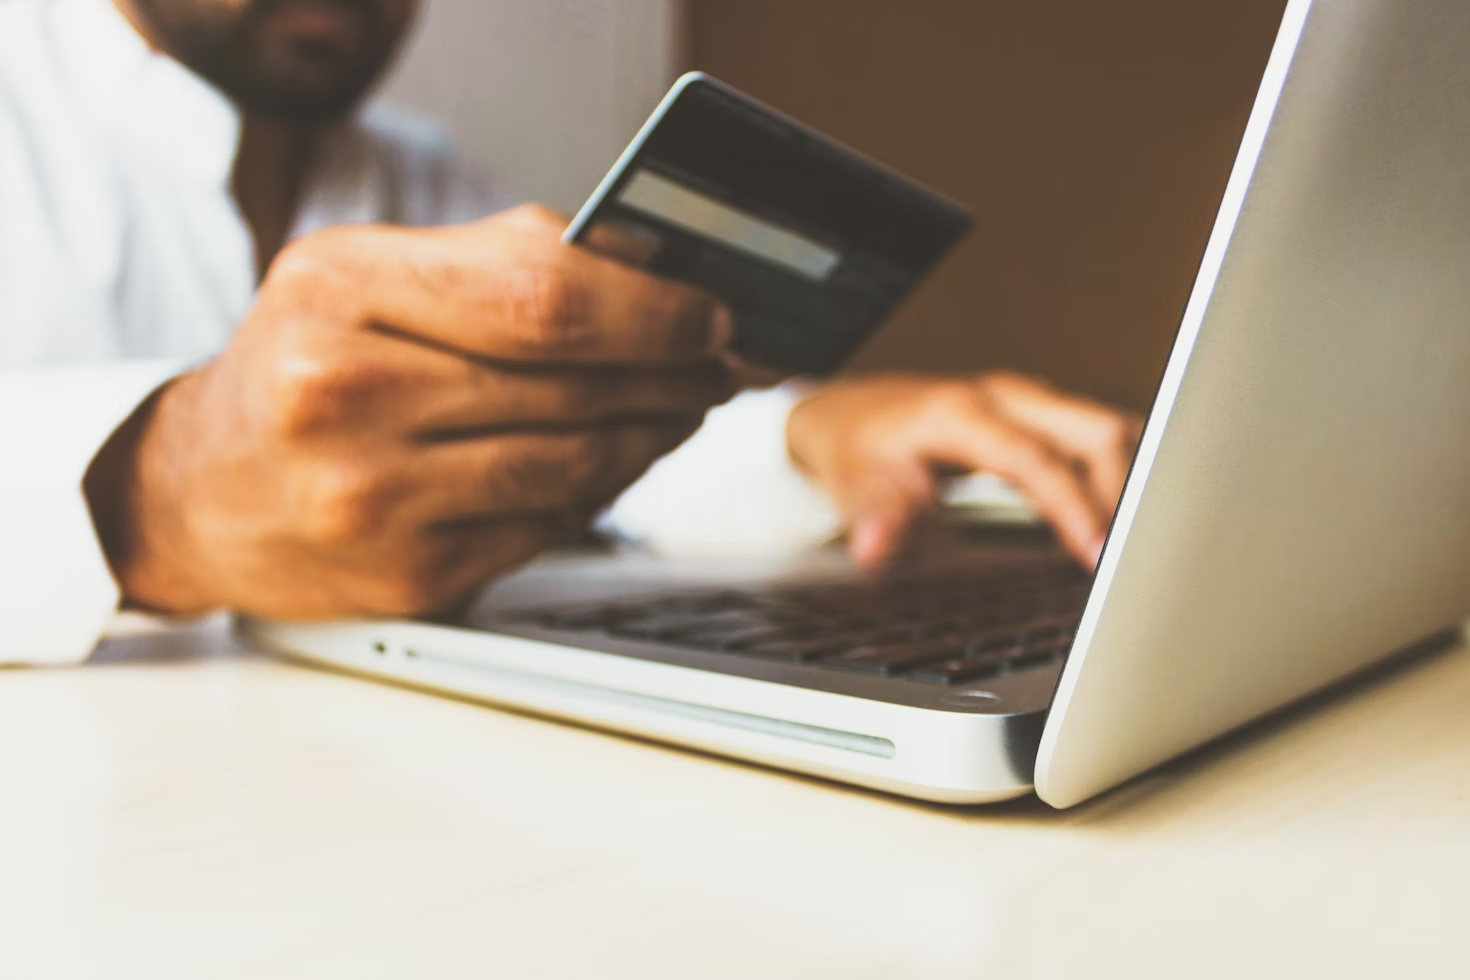

## Table of Contents

1. Introduction

2. Inferential Statistical Analysis

3. Profitability and ROI Analysis

4. Analysis of Conversion Rates by Day and Time 

5. Conclusion

## Introduction

### The data set used in this project is an older data set made public for a firm that provides digital advertising services. The company focuses on utilising big data and AI to exploit the potential inefficiencies of real-time bidding (RTB) on ad exchanges. The data set is from an advertising campaign that the company did for a fashion client, **Bella TK**,  who manufactures women's luxury hand bags. The primary objective of the campaign was that a half million online consumers would be targeted with ads for the company's hand bag, and a treatment group would receive an advertisement, while a control group would receive a PSA (Public Service Announcement). The below analysis is to determine whether the campaign was effective in generating new sales and the effect that advertising for the campaign had. In addition, the amount of conversion rates and profitability of the campaign will be analyzed, to determine if there's enough being generated from sales to justify future similar advertising efforts. At the time of the data creation, the cost per thousand impressions (CPM) was roughly \$9 USD. It was also estimated that the profitability of a user who converted was roughly $40 USD.

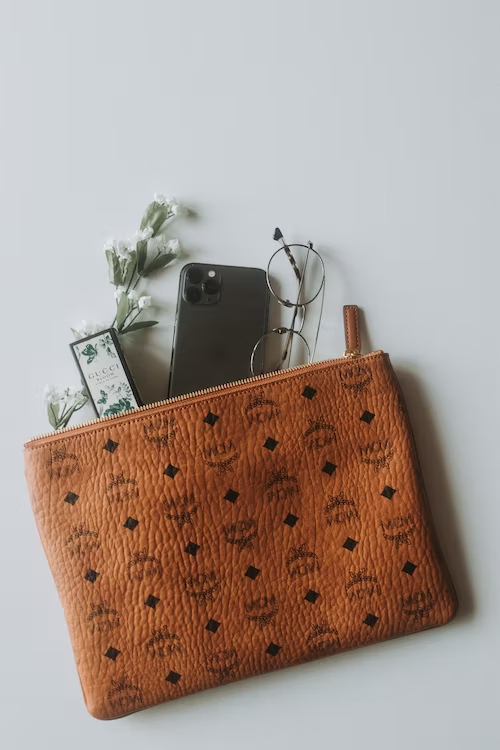

### Data and Scope

Each row in the data set represented a uniquely identified user in the ad campaign. For each user, the following six columns were provided.

#### ***user id:*** Unique identifier of the user

#### ***test:*** Whether the user was exposed to advertising or was in the control group. 1 if the user was exposed to the real ad, 0 if the user was in the control group and was shown a PSA.

#### ***converted:*** Whether the user converted. 1 if the user bought the handbag during the campaign, 0 if not.

#### ***tot_impr:*** The total number of ad impressions the user encountered. For users in the control group this counts the number of times they encountered the PSA.For exposed users it counts the number of times they were shown the ad.

#### ***mode_impr_day:*** Shows the day of the week on which the user encountered the most number of impressions. 1 means Monday, 7 means Sunday. For example if a given user encountered 2 impressions on Mondays, 3 on Tuesdays, 7 on Wednesdays, 0 on Thursdays and, Fridays, 9 on Saturdays and 2 on Sundays, this column takes the value of 6 (Saturday).

#### ***mode_impr_hour:*** Shows the hour of the day (0-23) in which the user encountered the most number of impressions.

### Summary Statistics of the Data

- Users Total users targeted in the campaign is 588101.


- Number of users in Exposed Group is 564577.

- Number of users in Control Group is 23524.

- Percentage of users in Control Group is 4.00%. 

- Number of converted users in Exposed Group is 14423.

- Number of converted users in Control Group is 420.

- Conversion rate of users in Exposed Group is 2.55%.

- Conversion rate of users in Control Group is 1.79%.

- Difference in conversion rates between both groups is 0.77%.


#### Importing of Packages and Data

In [1]:
install.packages("reshape")
install.packages("plotly")
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(reshape)
library(readxl)
library(tidyverse)
library(knitr)
library(plotly)
library(janitor)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


The following object is masked from ‘package:dplyr’:

    rename


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ reshape::expand() masks tidyr::expand()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ reshape::rename() masks dplyr::rename()


Attaching package: ‘plotly’


The following object is masked from ‘package:reshape’:

    rename


In [3]:
# Loading data file in
df <- read.csv("/content/B5896-XLS-ENG.csv", header=T)

In [4]:
head(df)

,user_id,test,converted,tot_impr,mode_impr_day,mode_impr_hour
,<int>,<int>,<int>,<int>,<int>,<int>
1,1069124,1,0,130,1,20
2,1119715,1,0,93,2,22
3,1144181,1,0,21,2,18
4,1435133,1,0,355,2,10
5,1015700,1,0,276,5,14
6,1137664,1,0,734,6,10


In [5]:
# Summary of each variables stats
summary(df[,c("test",	"converted",	"tot_impr",	"mode_impr_day", "mode_impr_hour")])

      test        converted          tot_impr       mode_impr_day  
 Min.   :0.00   Min.   :0.00000   Min.   :   1.00   Min.   :1.000  
 1st Qu.:1.00   1st Qu.:0.00000   1st Qu.:   4.00   1st Qu.:2.000  
 Median :1.00   Median :0.00000   Median :  13.00   Median :4.000  
 Mean   :0.96   Mean   :0.02524   Mean   :  24.82   Mean   :4.026  
 3rd Qu.:1.00   3rd Qu.:0.00000   3rd Qu.:  27.00   3rd Qu.:6.000  
 Max.   :1.00   Max.   :1.00000   Max.   :2065.00   Max.   :7.000  
 mode_impr_hour 
 Min.   : 0.00  
 1st Qu.:11.00  
 Median :14.00  
 Mean   :14.47  
 3rd Qu.:18.00  
 Max.   :23.00  

### Data Preprocessing for Interpretability of data

In [6]:
# Preprocessing data for interpretability 
df$test<-as.character(df$test)

df$test[df$test=="1"]<-"Treatment Group"
df$test[df$test=="0"]<-"Control Group"

df$conv_title[df$converted==1]<-"Converted"
df$conv_title[df$converted==0]<-"Didn't Convert"

In [7]:
# Calculating the conversion rates of each group
conv_<-df %>% group_by( test ) %>%
  summarize( conversion_rate = mean( converted ) )
conv_

test,conversion_rate
<chr>,<dbl>
Control Group,0.01785411
Treatment Group,0.02554656


In [8]:
# Calculating Conversions
df %>% group_by( test ) %>%
  dplyr::summarize( Total_Impressions = sum(converted))

test,Total_Impressions
<chr>,<int>
Control Group,420
Treatment Group,14423


In [9]:
# Frequency of Groups
df %>% count(test, sort = TRUE)

test,n
<chr>,<int>
Treatment Group,564577
Control Group,23524


In [10]:
# Aggregating the total CPM (Cost Per Mile) by group, by calculating the total impressions/1000 views. 
CPMofGroups <-df %>% group_by( test ) %>%
  dplyr::summarize( Total_Impressions = (sum( tot_impr ))/1000)
print(CPMofGroups)

# A tibble: 2 × 2
  test            Total_Impressions
  <chr>                       <dbl>
1 Control Group                582.
2 Treatment Group            14015.


In [11]:
# Summarizing frequency of conversion/non-conversions, by treatment and control group
tabyl(df,test,conv_title)


test,Converted,Didn't Convert
<chr>,<dbl>,<dbl>
Control Group,420,23104
Treatment Group,14423,550154


In [12]:
# Looking at conversion rate as a function of the day, to determine if a weekend or weekday effect is visible
day_conversions <- df  %>%
  group_by( mode_impr_day, test ) %>%
  dplyr::summarize( conversion_rate = mean( converted ) )
day_conversions

`summarise()` has grouped output by 'mode_impr_day'. You can override using the
`.groups` argument.


mode_impr_day,test,conversion_rate
<int>,<chr>,<dbl>
1,Control Group,0.02255854
1,Treatment Group,0.03324120
2,Control Group,0.01444788
2,Treatment Group,0.03044038
3,Control Group,0.01575931
3,Treatment Group,0.02535586
4,Control Group,0.02023047
4,Treatment Group,0.02163714
5,Control Group,0.01630292


## Performing T-test to view statistical significance between both groups mean conversions

### At this point, it's concluded that the advertising campaign was effective and additional consumers did indeed convert as a result of the campaign. This outcome is verified by performing a t-test on the conversions between Treatment and Control groups, with our null hypothesis stating that there is no difference between the two groups. After performing the t-test, we reject the null hypothesis in favor of the alternative, which proved statsitically significant.

#### H<sub>o</sub>: μ<sub>1</sub> ≠ μ<sub>2</sub>
#### H<sub>a</sub>: μ<sub>1</sub> > μ<sub>2</sub>



In [13]:
df_treatment <- subset(df, test == "Treatment Group")

df_control <- subset(df, test == "Control Group")

#Checking variance of each group's variances are equal or not. The P-value of the F-test is less than 0.05, so we can declare the variances are not equal
var.test(df_treatment$converted, df_control$converted, alternative = "two.sided")

t.test(df_treatment$converted, df_control$converted, alternative= "greater",var.equal = FALSE)


	F test to compare two variances

data:  df_treatment$converted and df_control$converted
F = 1.4196, num df = 564576, denom df = 23523, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.394045 1.445355
sample estimates:
ratio of variances 
          1.419586 



	Welch Two Sample t-test

data:  df_treatment$converted and df_control$converted
t = 8.6572, df = 26384, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.006230842         Inf
sample estimates:
 mean of x  mean of y 
0.02554656 0.01785411 


## Reviewing Profitability of Campaign (Revenue - Costs)

#### Revenue:
Given that a converting user is assumed to be worth about \$40, the amount that Bella TK made by having the campaign can be found by taking the differences between conversion rates of the treatment and control group. The difference in conversion rates will be the added benefit of using the treatment in the campaign and then multiplying by the total number of individuals who were in the treatment group. By doing the mentioned calculations, Bella TK made (0.0255-0.0179)\*564577\*40 = $171,631 more revenue than had they not used the advertisement campaign.


#### Costs:

Assuming an average cost of \$9 per CPM (1000 impressions), the campaign for the treatment 
group costed 14,014.7\*\$9 = \$126,132.31. Whereas the cost of the campaign for the control group was 582.5\*\$9 = \$5,242.33. In total the combined cost of the campaign was $131,374.

### ROI of Campaign

The ROI can be calculated as the total profit brought in by the campaign divided by the initial cost of investment. Therefore, the campaign had an ROI of (\$173,663.88 -\$131,374.64)/ $131,374.64 = 32.19%



## Data Pre-preprocessing for visualizations

In [14]:
# Getting Bins created for Dataset, binning by Total Impressions
df$bins<-"1"
df$bins<- ifelse(df$tot_impr>250, ">250+",df$bins)
df$bins<- ifelse(df$tot_impr<251, "201-250",df$bins)
df$bins<- ifelse(df$tot_impr<201, "151-200",df$bins)
df$bins<- ifelse(df$tot_impr<201, "151-200",df$bins)
df$bins<- ifelse(df$tot_impr<151, "101-150",df$bins)
df$bins<- ifelse(df$tot_impr<101, "51-100",df$bins)
df$bins<- ifelse(df$tot_impr<51, "0-50",df$bins)

# Finding Bin Counts
df %>% count(df$bins)

#Sort Bins 
df$bins <-factor(df$bins , levels = c("0-50", "51-100", "101-150", "151-200", "201-250", ">250+"))

df$bins,n
<chr>,<int>
>250+,3616
0-50,519035
101-150,12387
151-200,4725
201-250,2336
51-100,46002


In [15]:
# Preprocessing Dataset for Day of Week Analysis
df$day<-"Sunday"
df$day<- ifelse(df$mode_impr_day==1, "Monday",df$day)
df$day<- ifelse(df$mode_impr_day==2, "Tuesday",df$day)
df$day<- ifelse(df$mode_impr_day==3, "Wednesday",df$day)
df$day<- ifelse(df$mode_impr_day==4, "Thursday",df$day)
df$day<- ifelse(df$mode_impr_day==5, "Friday",df$day)
df$day<- ifelse(df$mode_impr_day==6, "Saturday",df$day)

#Sort Days field
df$day <-factor(df$day , levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

In [16]:
# Looking at the conversion rates as a function of the total impressions
tot_impr_bin <-df  %>%
  group_by( bins ) %>%
  dplyr::summarize( conversion_rate = mean( converted ) )
tot_impr_bin


bins,conversion_rate
<fct>,<dbl>
0-50,0.01098577
51-100,0.11395157
101-150,0.17599096
151-200,0.16761905
201-250,0.14982877
>250+,0.15956858


In [17]:
# Summarizing frequency of conversion/non-conversions, by bins
tabyl(df,bins,test,conv_title)


bins,Control Group,Treatment Group
<fct>,<dbl>,<dbl>
0-50,193,5509
51-100,107,5135
101-150,57,2123
151-200,23,769
201-250,17,333
>250+,23,554
bins,Control Group,Treatment Group
<fct>,<dbl>,<dbl>
0-50,20468,492865


In [18]:
# Calculating table data for Various Metrics for Conversions
impr<-df %>% group_by( bins ) %>%
  summarize( Total_Impressions = sum(tot_impr) , conversion_rate = mean( converted ), Conversions = sum(converted), Impressions_Per_Conversion = Total_Impressions/Conversions )
impr

bins,Total_Impressions,conversion_rate,Conversions,Impressions_Per_Conversion
<fct>,<int>,<dbl>,<int>,<dbl>
0-50,7166474,0.01098577,5702,1256.8351
51-100,3191844,0.11395157,5242,608.8981
101-150,1499977,0.17599096,2180,688.0628
151-200,813435,0.16761905,792,1027.0644
201-250,520017,0.14982877,350,1485.7629
>250+,1405435,0.15956858,577,2435.7626


## Visualizations of Data and Interpretations




In [19]:
# Setting Options for ggplots
options(repr.plot.width=16, repr.plot.height=13)

#### In the below histograms, it can be seen that the most effective amount of impressions for conversions on a user is below 200. Therefore, an ideal amount of impressions each unique user should be up to 200 per user. After that amount is reached, diminishing returns increase, so an attempt should be made at that point to shift ad targeting to new unique users in the target demographic.

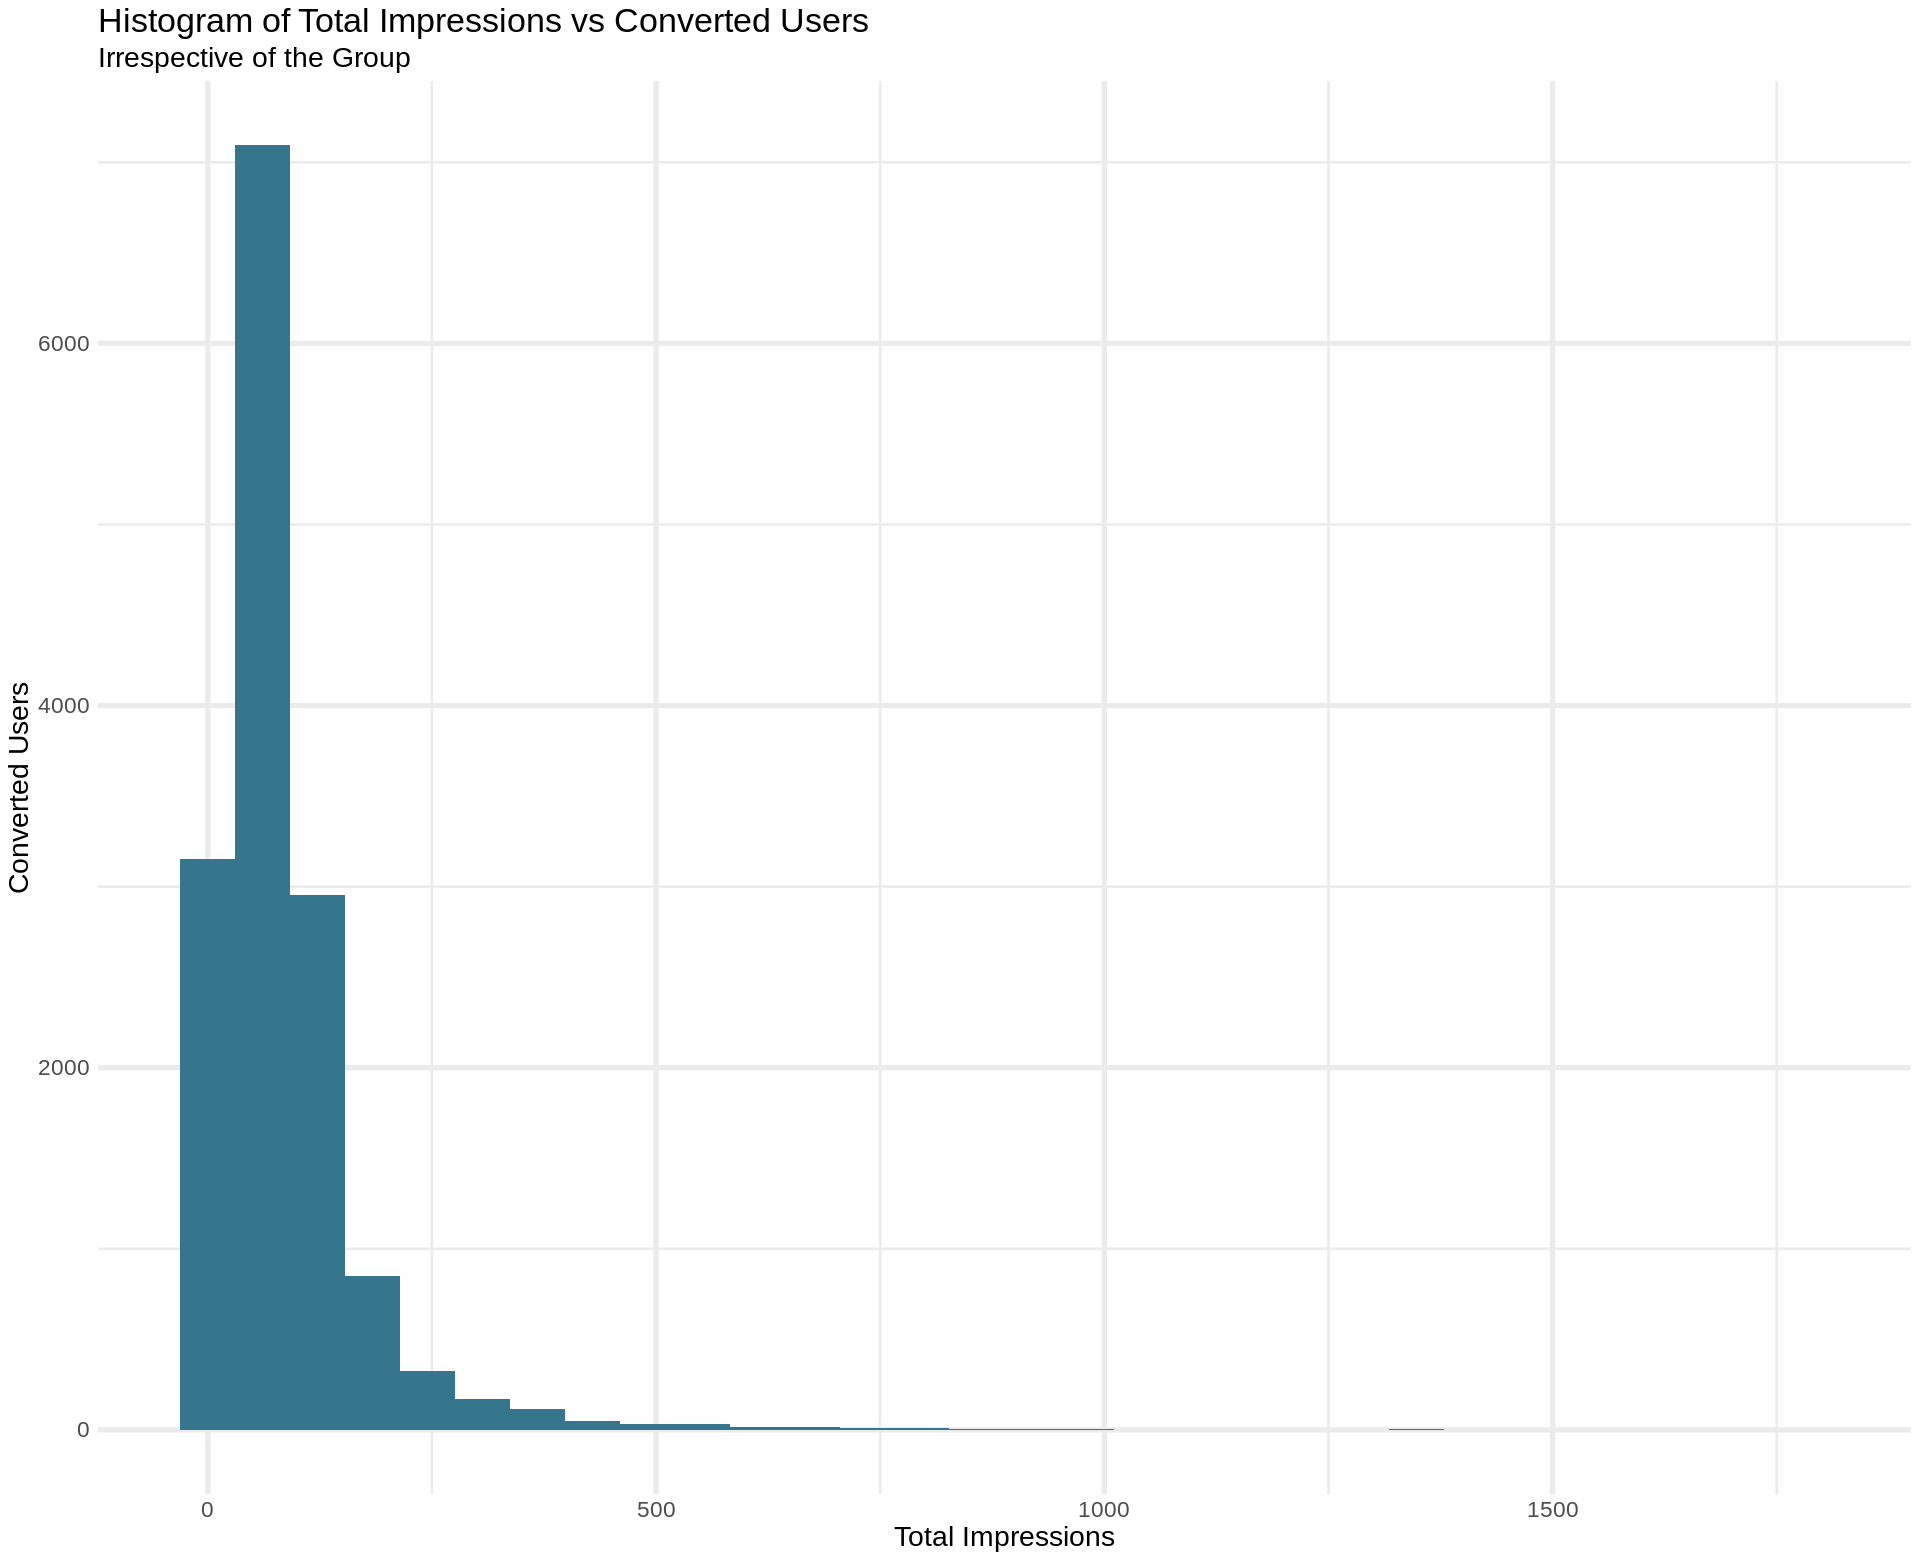

In [20]:
df %>%
  filter(conv_title %in% "Converted" ) %>%
  ggplot() + aes(x = tot_impr) + geom_histogram(bins = 30L, fill = "#35758D") +
  labs(x = "Total Impressions", y = "Converted Users", title = "Histogram of Total Impressions vs Converted Users", subtitle = "Irrespective of the Group") +
  theme_minimal()+ theme(text = element_text(size = 17), element_line(size = 1.5))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 40 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


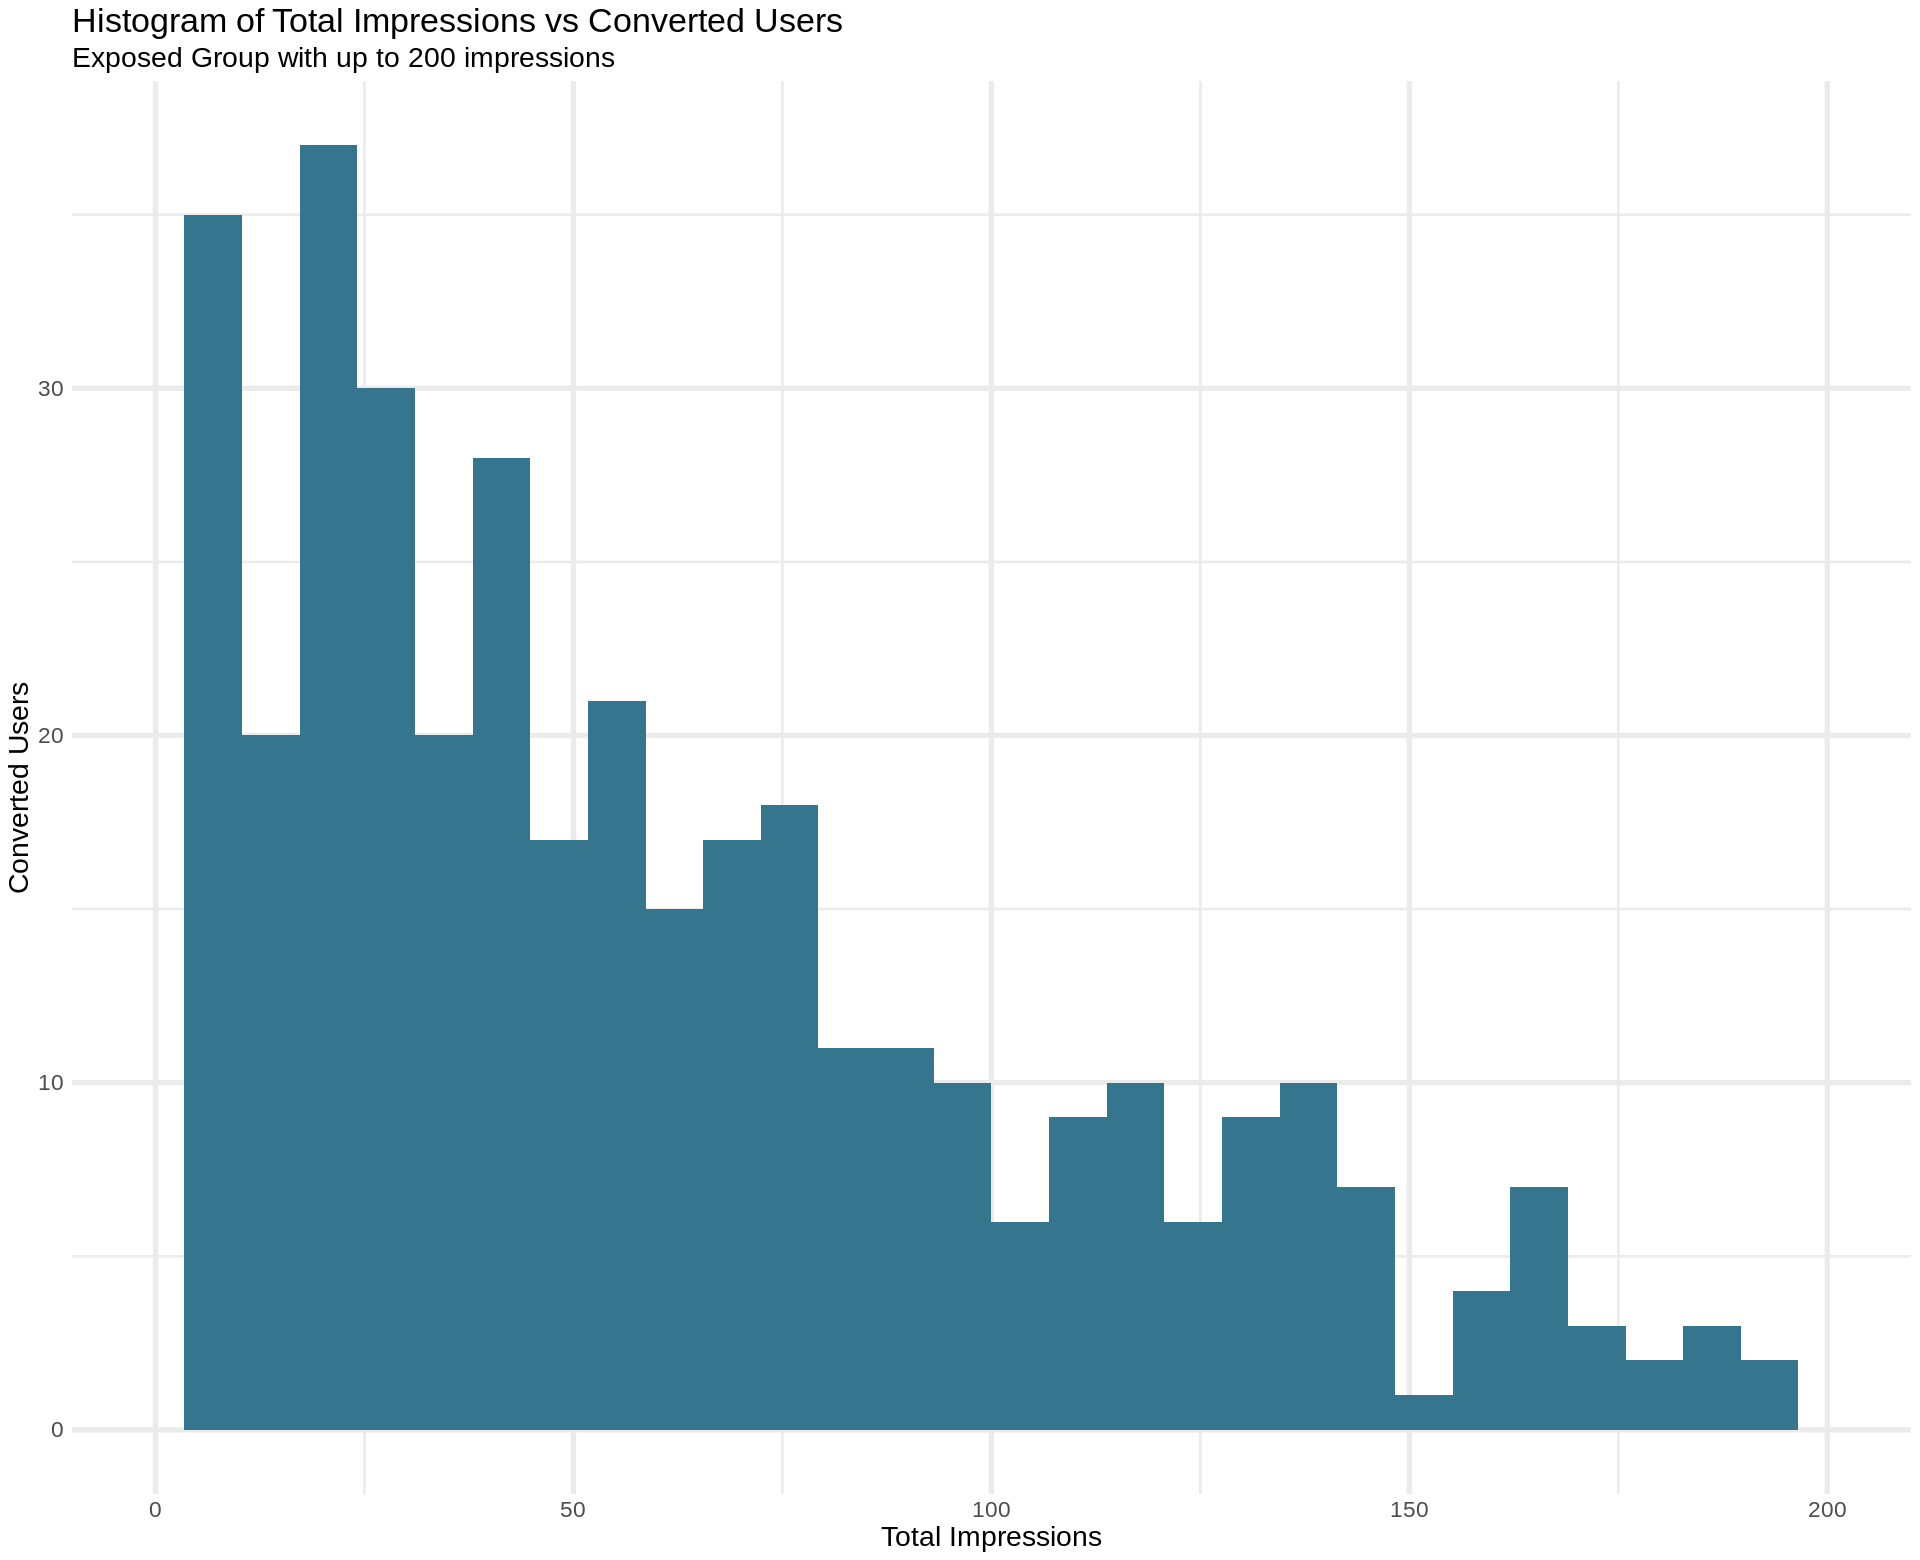

In [21]:
df%>%
  filter(test %in% "Control Group") %>%
  filter(conv_title %in% "Converted") %>% ggplot() +
  aes(x = tot_impr) + geom_histogram(fill = "#35758D") +
  labs(x = "Total Impressions", y = "Converted Users", title = "Histogram of Total Impressions vs Converted Users", subtitle = "Exposed Group with up to 200 impressions") +
  theme_minimal() + xlim(0L, 200L) + theme(text = element_text(size = 17), element_line(size = 1.5))


In [22]:
bin_groups <- group_by(df, bins)
grouped_df <- summarise(bin_groups, Users = n(), Conversions = sum(converted), Total_Impressions = sum(tot_impr))

# Calculate the conversion rate which is percentage of users converted in the impression range
grouped_df$ConversionRate <- (grouped_df$Conversions / grouped_df$Users) 

# Calculate the no. of impressions served per conversion in the same impression ranges
grouped_df$Impressions_by_conversions <- grouped_df$Total_Impressions / grouped_df$Conversions

#Sort Bins 
grouped_df$bins <-factor(grouped_df$bins , levels = c("0-50", "51-100", "101-150", "151-200", "201-250", ">250+"))


#### In the graphs below, it can be seen that conversion rates peak at 101-150 impressions for a user and that the impressions per conversion rate decreases up until 101-150 impressions. Therefore, it can be suggested that the range of impressions most effective for advertising is in the area where a unique user has between 0 and 150 impressions.

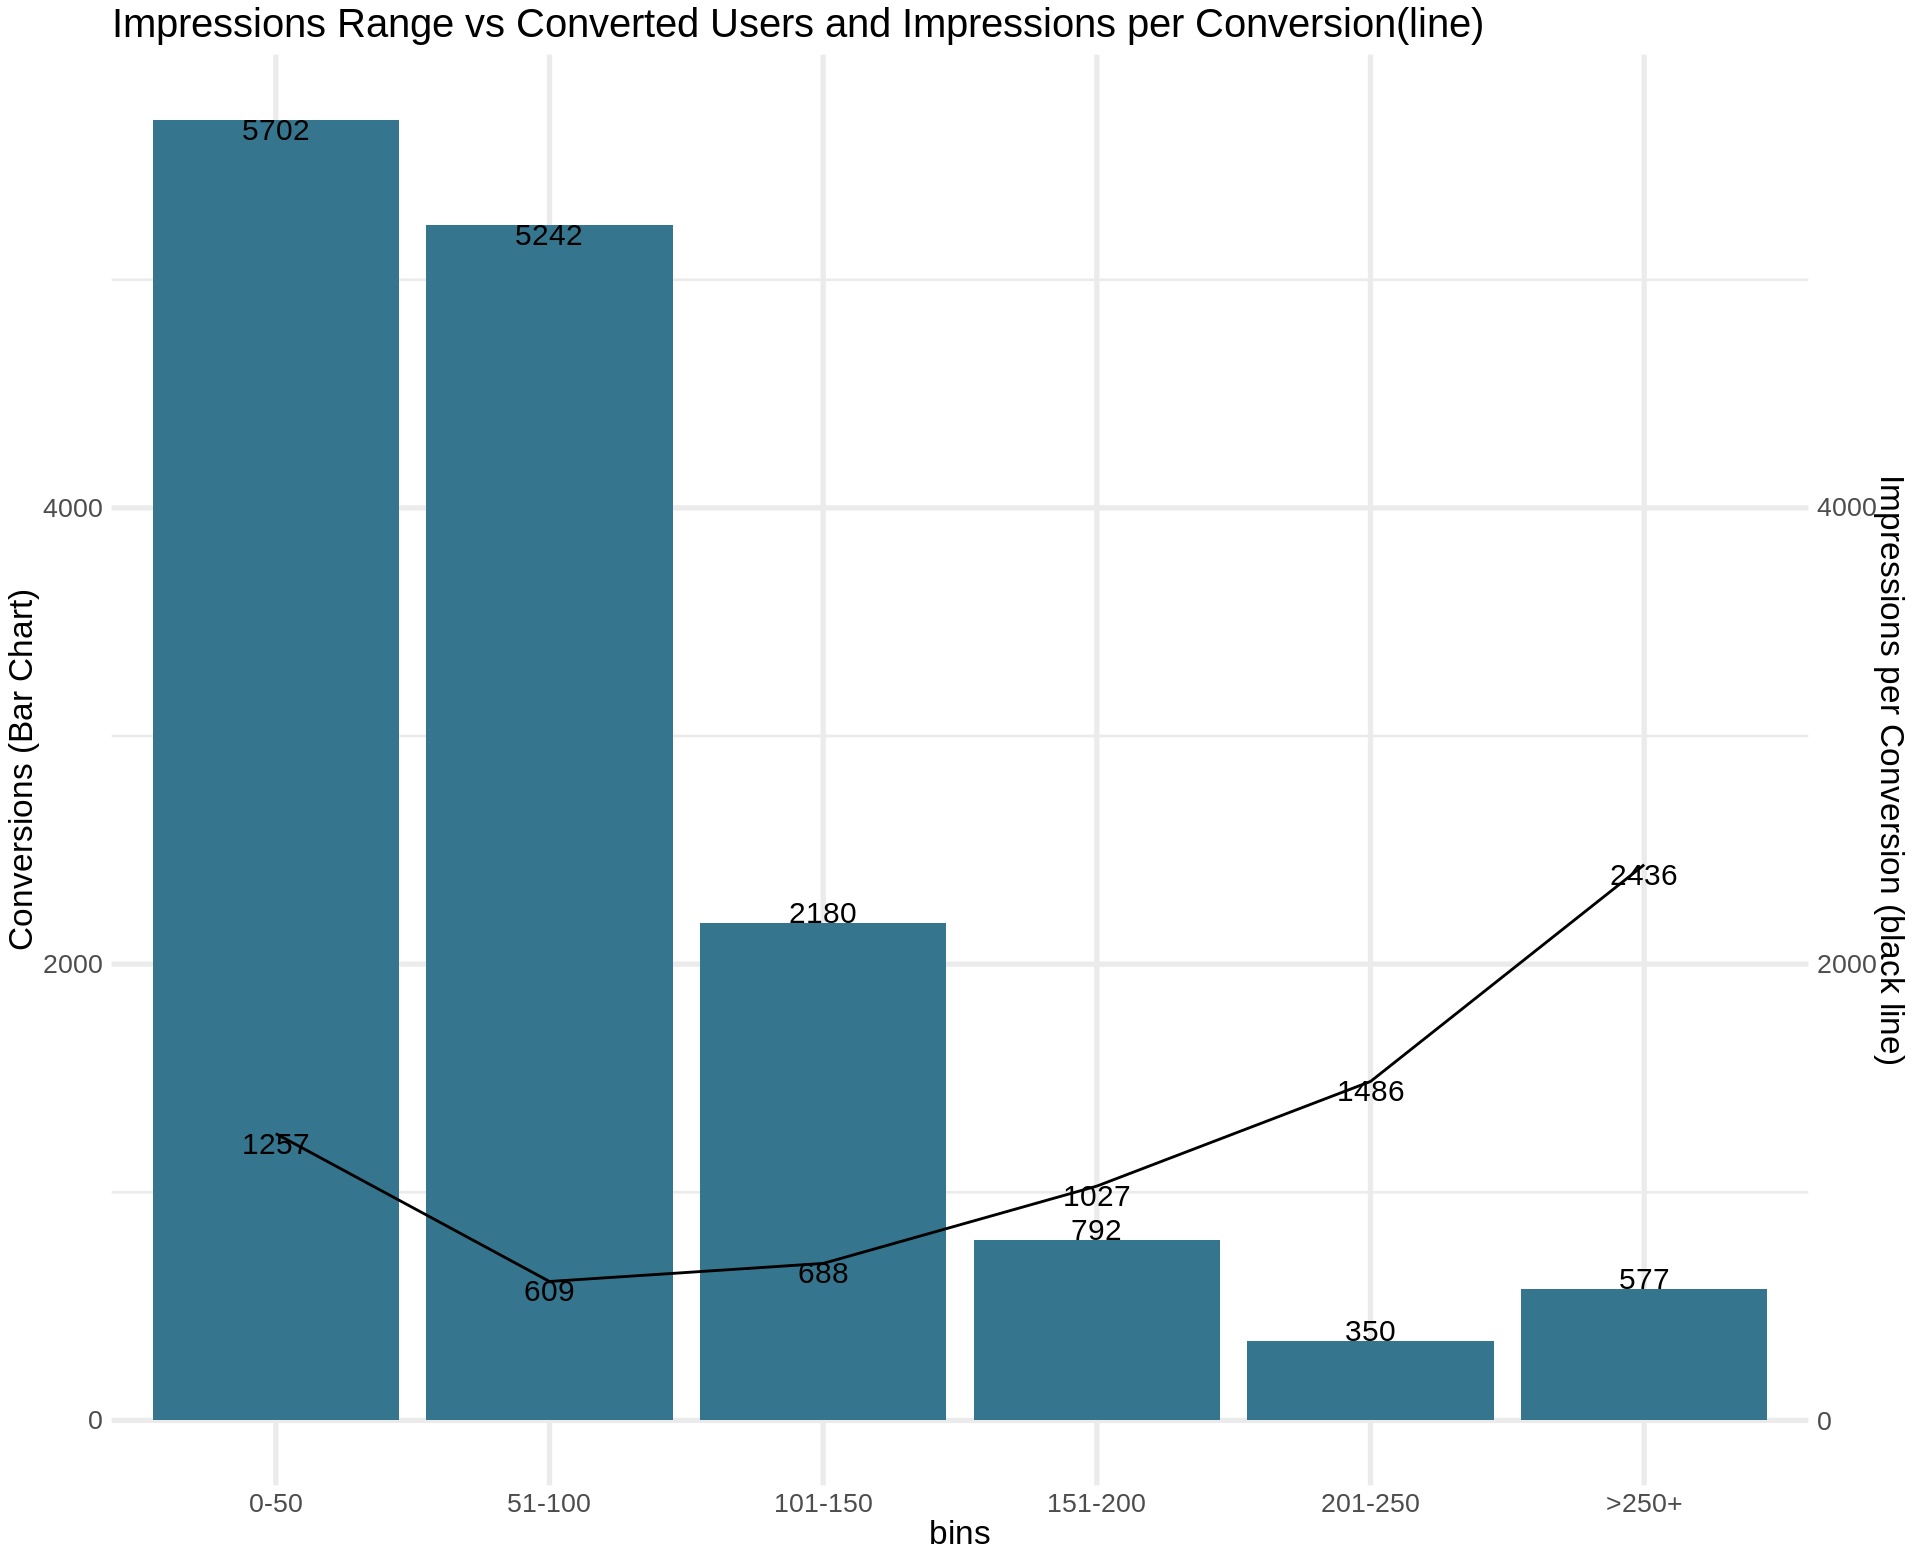

In [23]:
#Plot conversion rates for those who were in the control group and for those who were exposed to the ad

p<-ggplot(grouped_df) +
  aes(x = bins, weight = Conversions) +
  geom_bar(fill = "#35758D") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward", size=6.3) +
  geom_line(aes(x = bins, y = Impressions_by_conversions), size = .8, color = "black", group = 1) + 
  scale_y_continuous(name = "Conversions (Bar Chart)", sec.axis = sec_axis(~ . * 1, name = "Impressions per Conversion (black line)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "outward", size=6.3) +
  labs(title = "Impressions Range vs Converted Users and Impressions per Conversion(line)") +
  theme_minimal()+ theme(text = element_text(size = 20), element_line(size = 1.5))

p


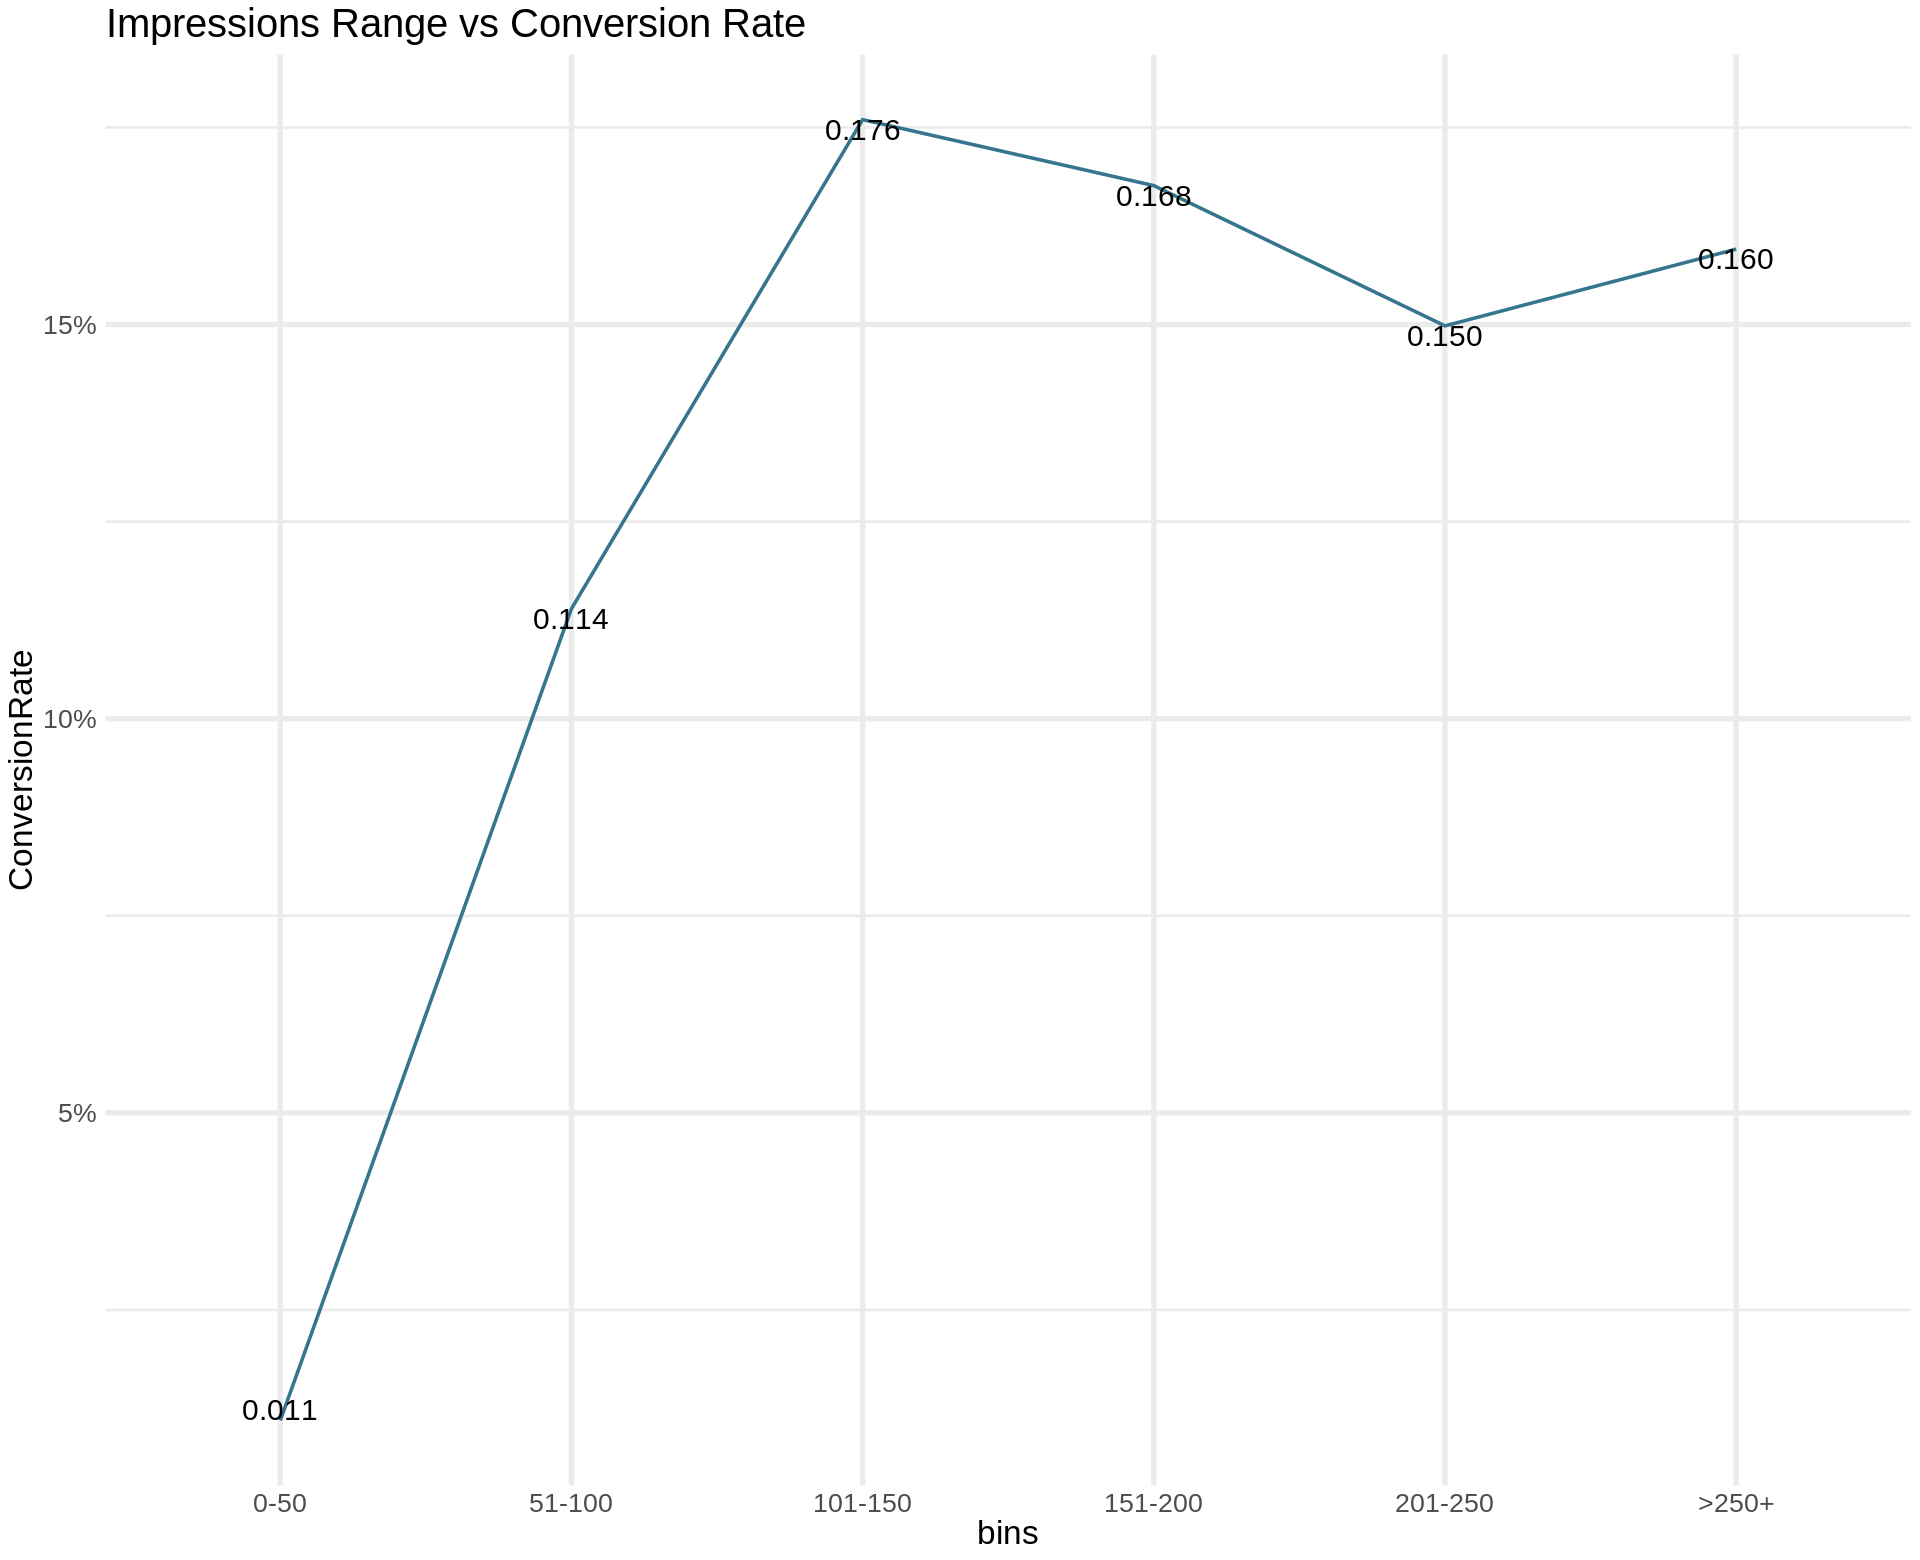

In [24]:
#Plot conversion rates for those who were in the control group and for those who were exposed to the ad
p2<- ggplot(grouped_df) +
  geom_line(aes(x = bins, y = ConversionRate), size = 1, color = "#35758D", group = 1) +
  geom_text(aes(x = bins, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "inward", size=6.3) +
  labs(title = "Impressions Range vs Conversion Rate") +
  theme_minimal()+ scale_y_continuous(labels=scales::percent)+ theme(text = element_text(size = 20), element_line(size = 1.5))

p2


In [25]:
# Creating Plots for Treatment Group Conversions, Impressions, and Conversion Rates
exposed <- subset(df, df$test == "Treatment Group" )
exposed <- group_by(exposed, bins)
exposed_df <- summarise(exposed, Users = n(), Conversions = sum(converted), Total_Impressions  = sum(tot_impr))
exposed_df$ConversionRate <- (exposed_df $Conversions / exposed_df $Users) 
exposed_df$Impressions_by_conversions <- exposed_df$Total_Impressions / exposed_df$Conversions


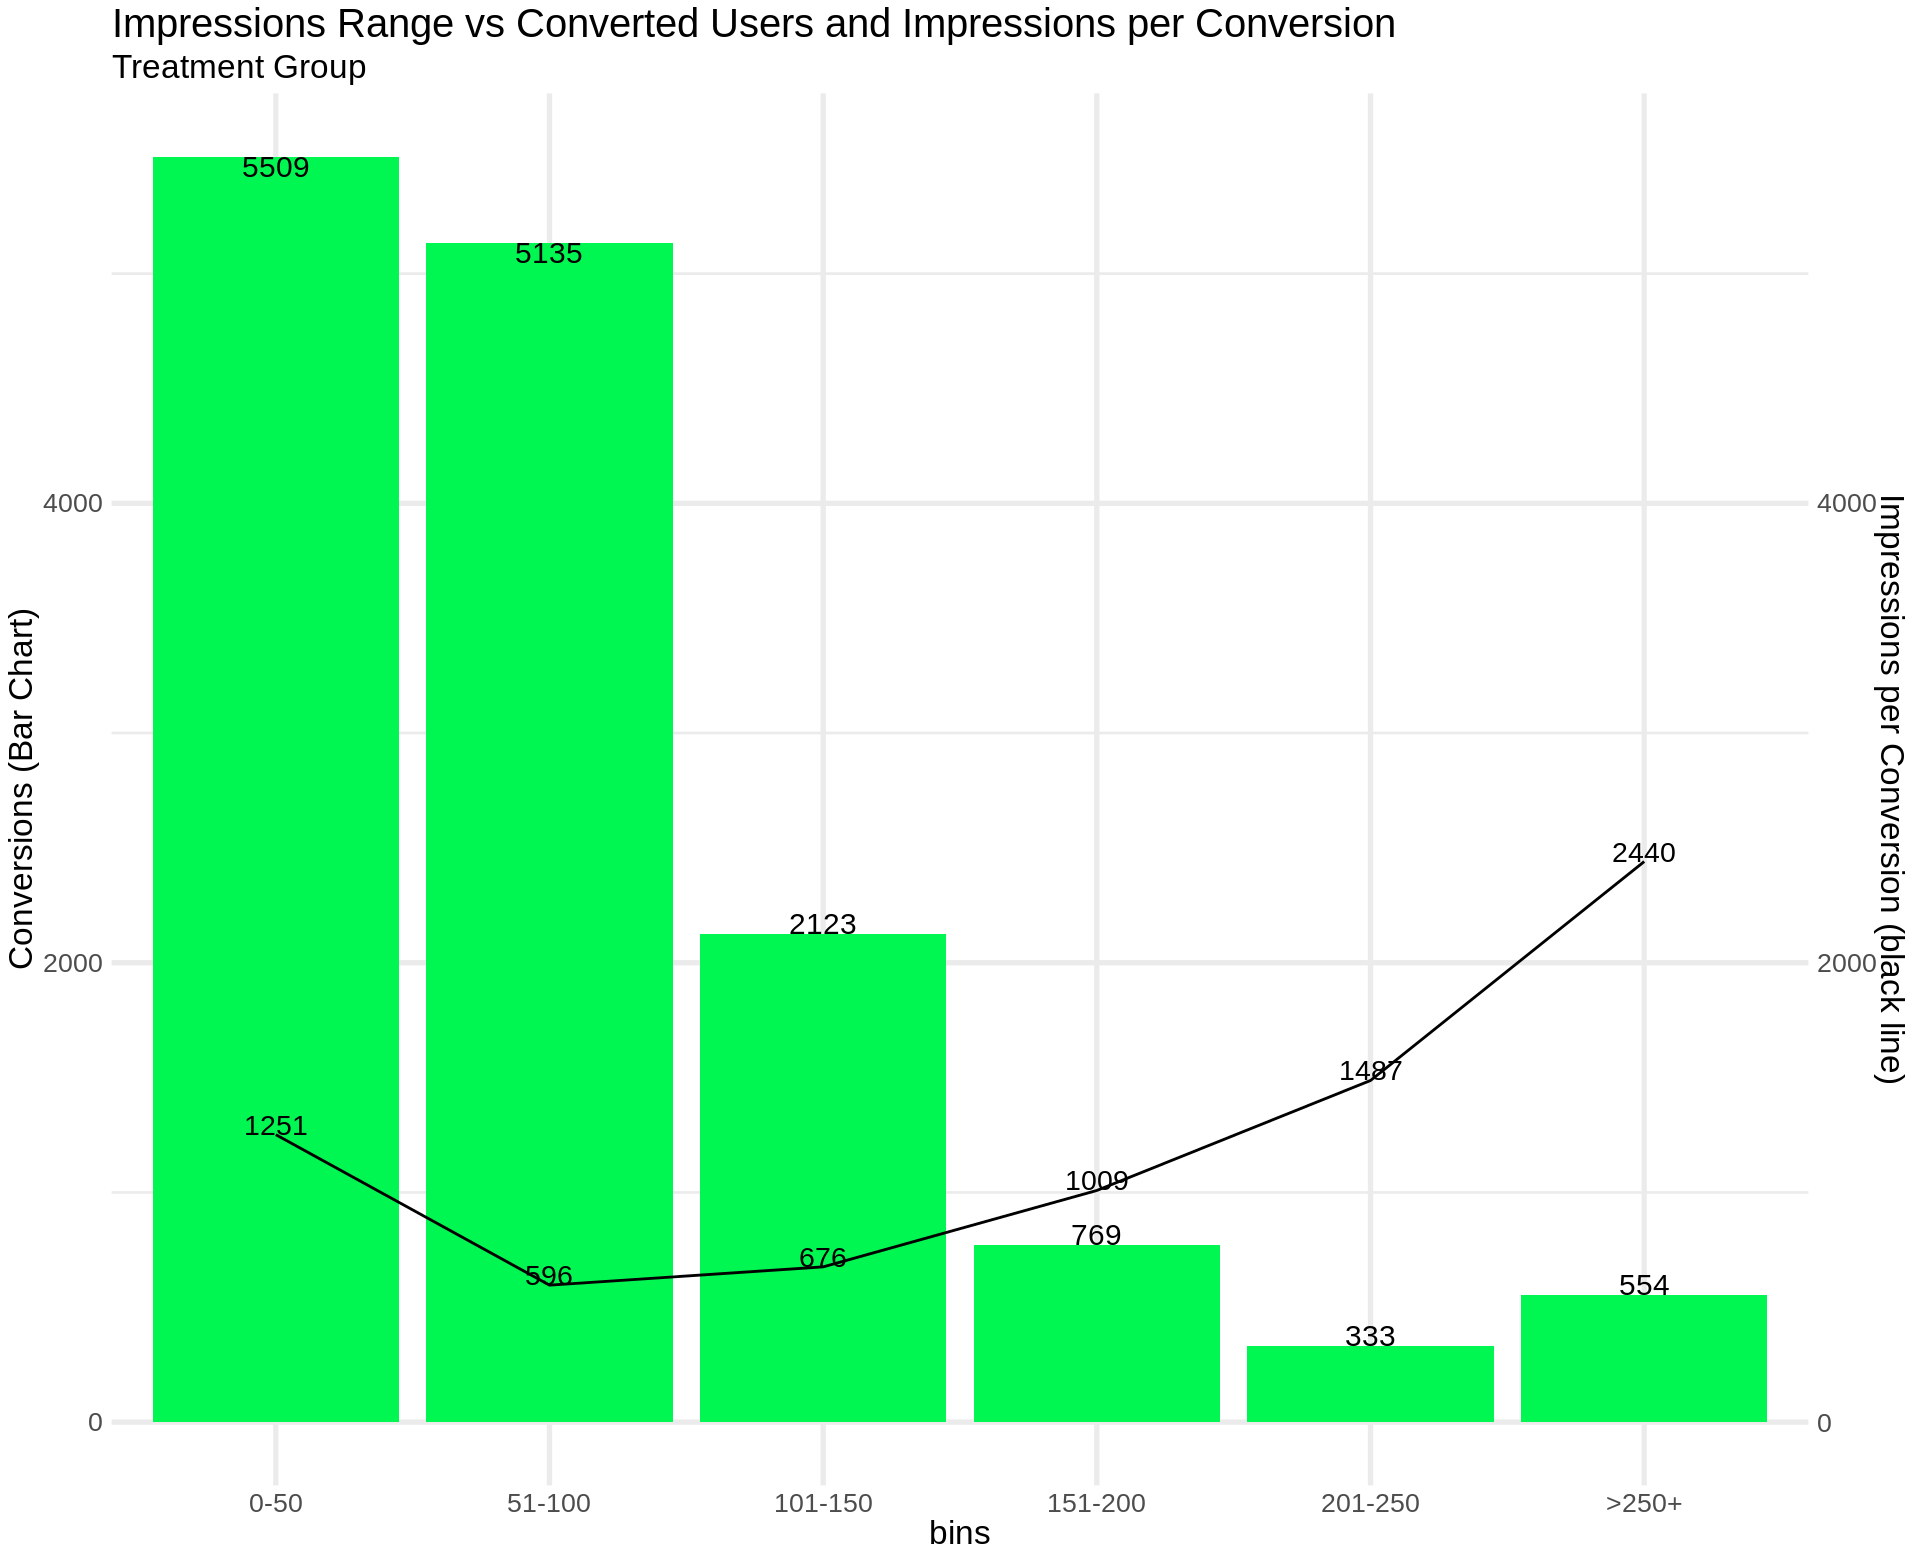

In [26]:
# Plotting Treatment Group Converted Users by Impressions
p3<-ggplot(exposed_df) +
  aes(x = bins, weight = Conversions) +
  geom_bar(fill = "#00F752") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward", size=6.3) +
  geom_line(aes(x = bins, y = Impressions_by_conversions), size = .8, color = "black", group = 1) + 
  scale_y_continuous(name = "Conversions (Bar Chart)", sec.axis = sec_axis(~ . * 1, name = "Impressions per Conversion (black line)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "inward",size=6) +
  labs(title = "Impressions Range vs Converted Users and Impressions per Conversion", subtitle = "Treatment Group") +
  theme_minimal()+ theme(text = element_text(size = 20), element_line(size = 1.5))


p3



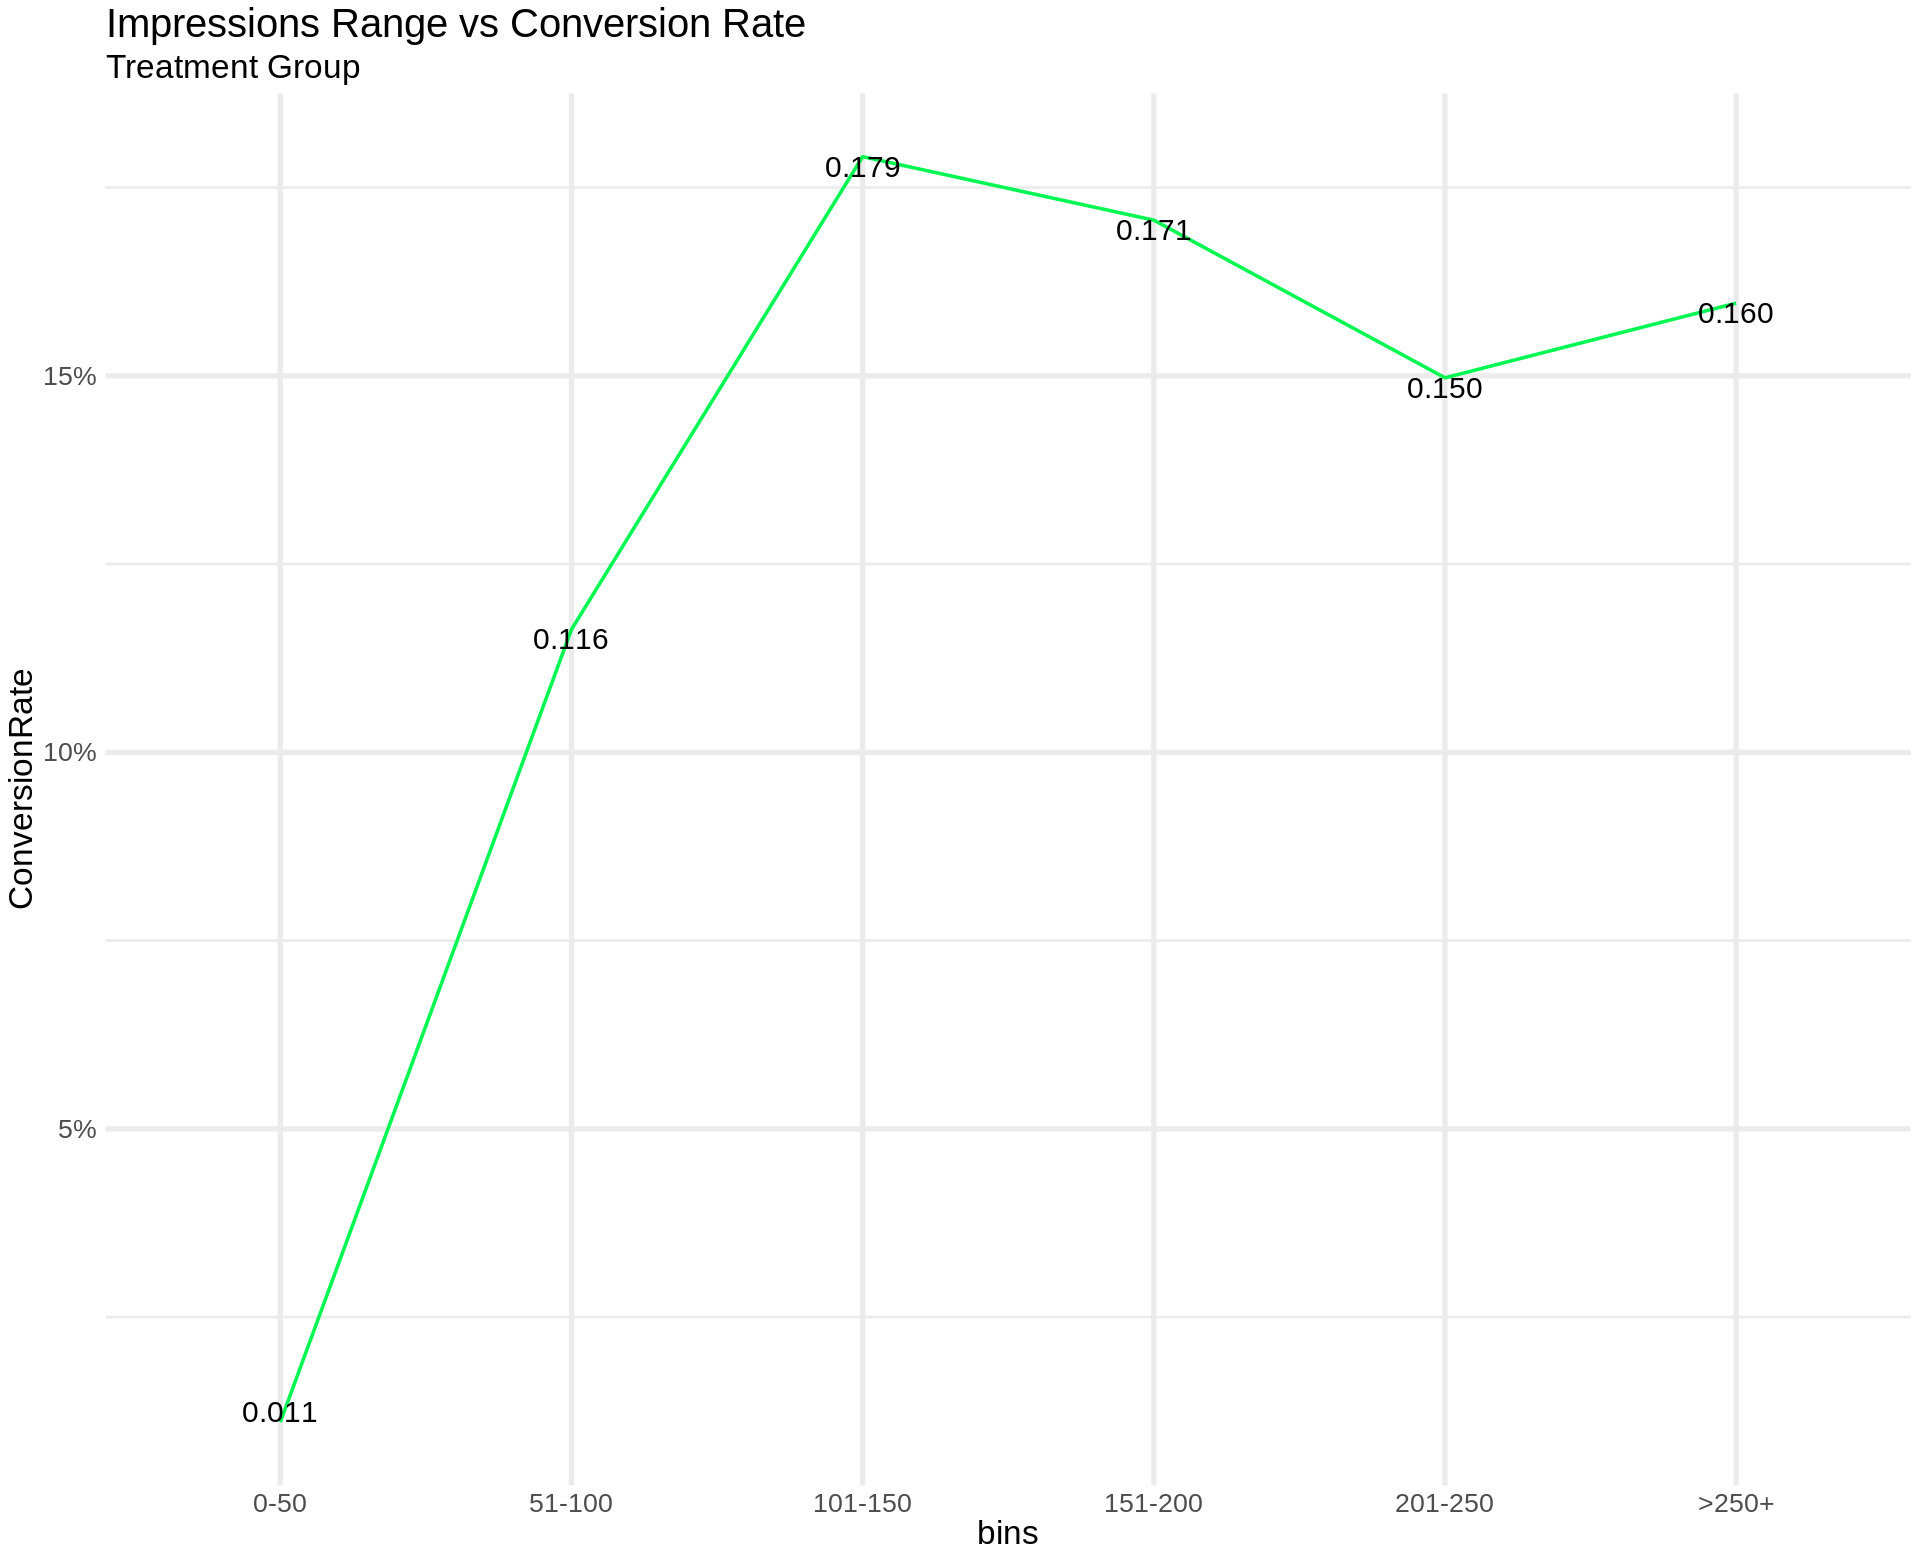

In [27]:
# Plotting Treatment Group Conversion rates by Impressions
p4<- ggplot(exposed_df) +
  geom_line(aes(x = bins, y = ConversionRate), size = 1, color = "#00F752", group = 1) +
  geom_text(aes(x = bins, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "inward", size=6.3) +
  labs(title = "Impressions Range vs Conversion Rate", subtitle = "Treatment Group") +
  theme_minimal()+ scale_y_continuous(labels=scales::percent)+ theme(text = element_text(size = 20), element_line(size = 1.5))

p4


In [28]:
# Creating Plots for Control Group Conversions, Impressions, and Conversion Rates
control <- subset(df, df$test == "Control Group" )
control <- group_by(control, bins)
control_df <- summarise(control, Users = n(), Conversions = sum(converted), Total_Impressions  = sum(tot_impr))
control_df$ConversionRate <- (control_df $Conversions / control_df $Users) 
control_df$Impressions_by_conversions <- control_df$Total_Impressions / control_df$Conversions

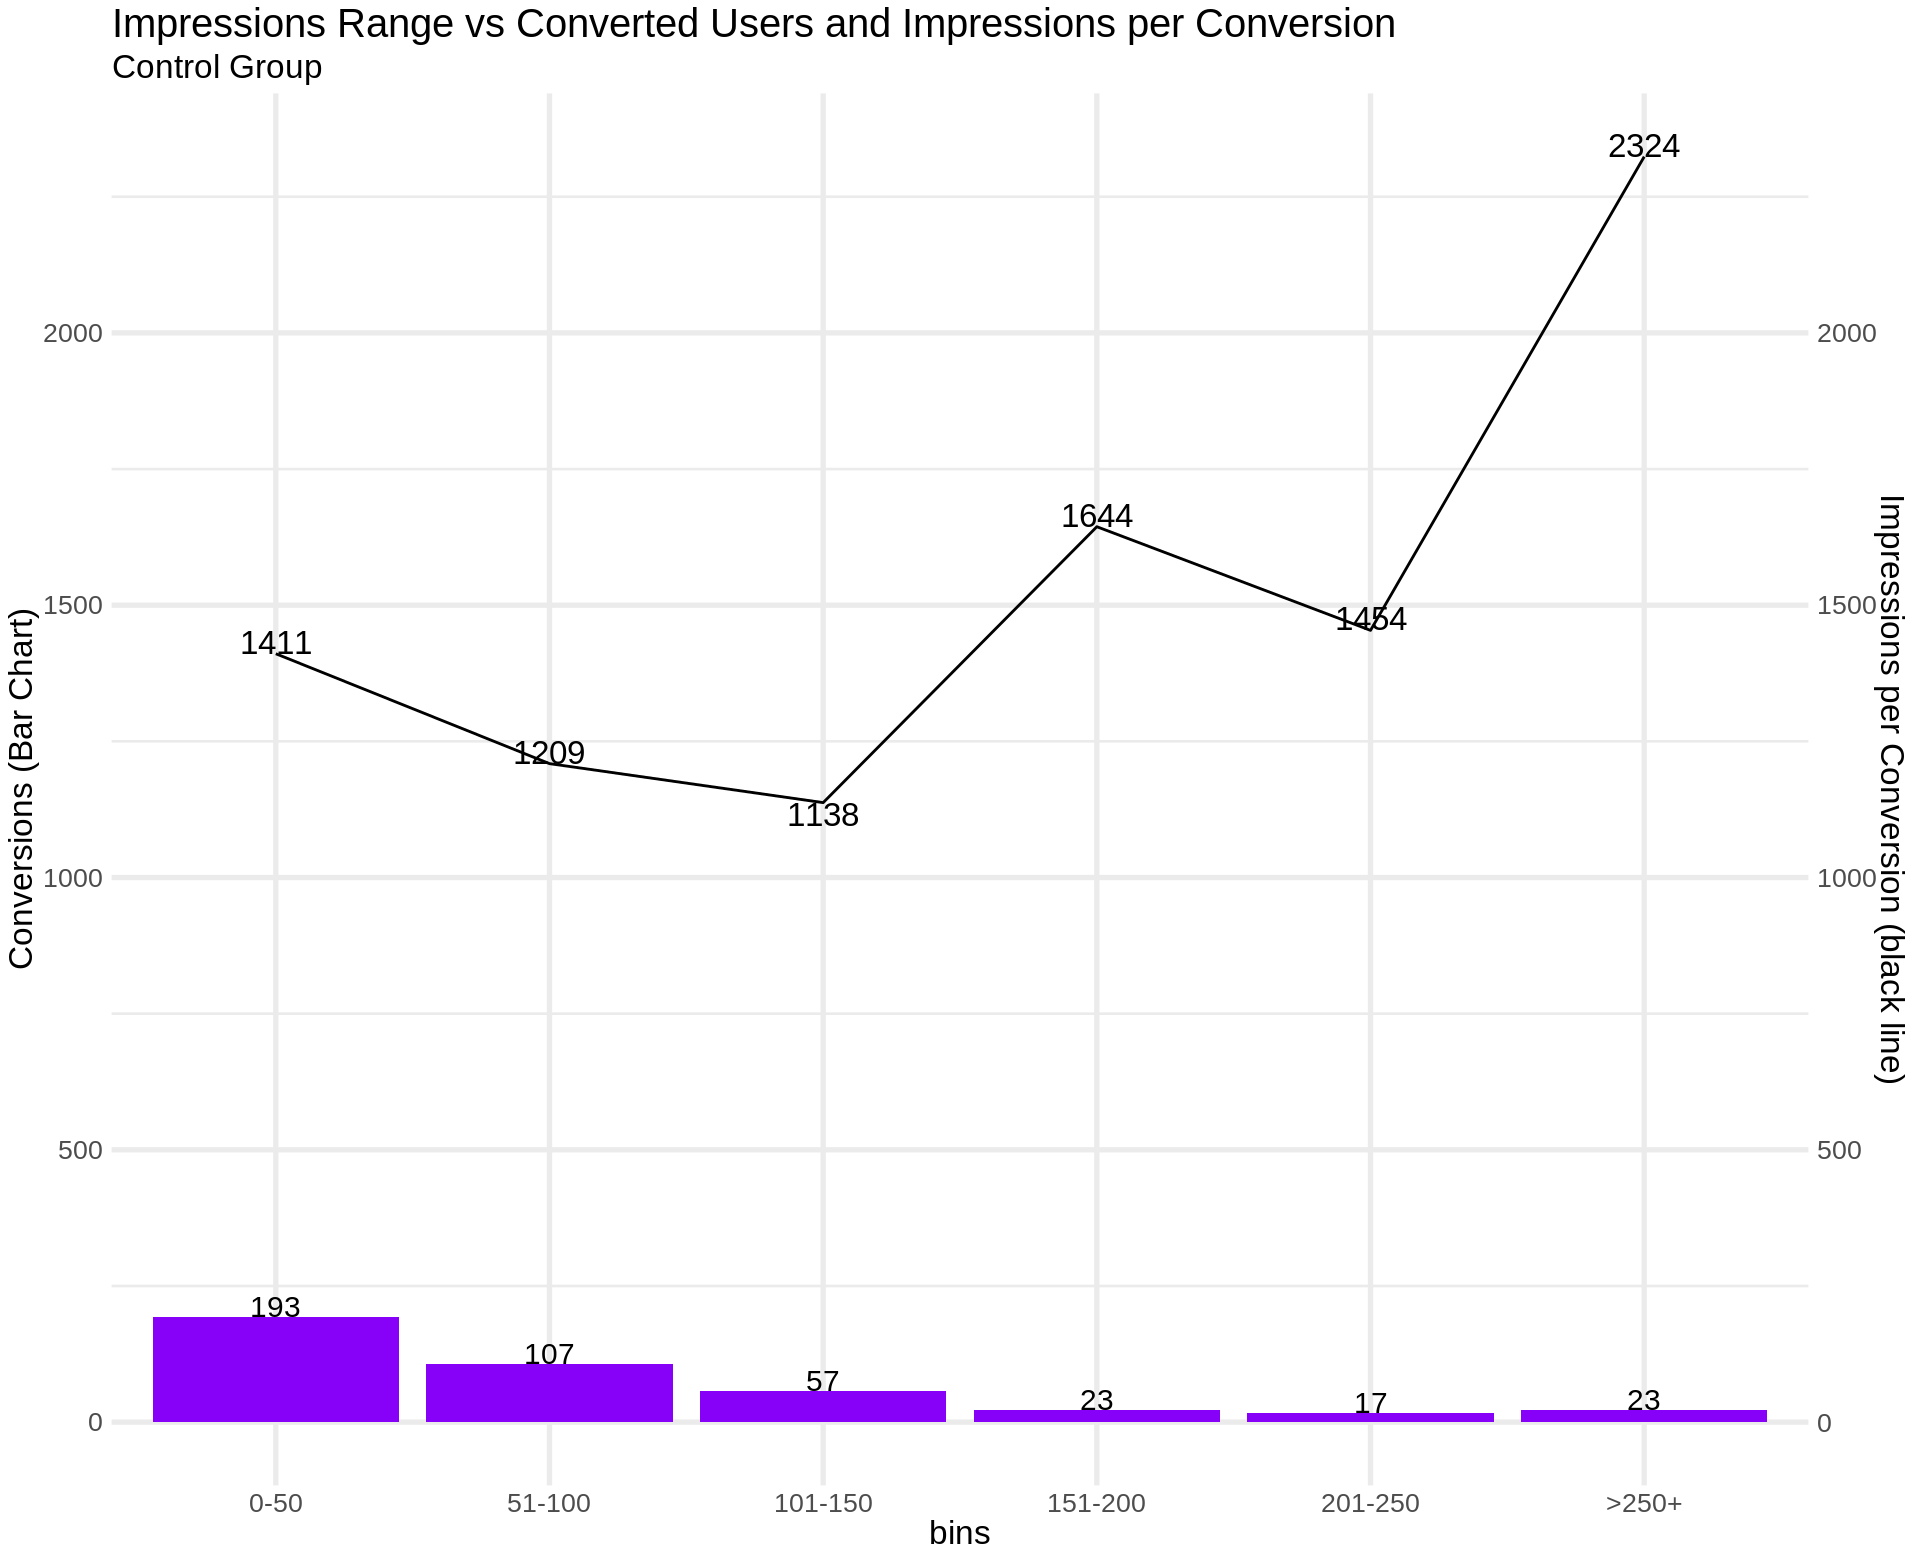

In [29]:
# Plotting Control Group Converted Users by Impressions
p5<-ggplot(control_df) +
  aes(x = bins, weight = Conversions) +
  geom_bar(fill = "#8700F7") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward", size=6.3) +
  geom_line(aes(x = bins, y = Impressions_by_conversions), size = .8, color = "black", group = 1) + 
  scale_y_continuous(name = "Conversions (Bar Chart)", sec.axis = sec_axis(~ . * 1, name = "Impressions per Conversion (black line)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "outward",size=7) +
  labs(title = "Impressions Range vs Converted Users and Impressions per Conversion", subtitle = "Control Group") +
  theme_minimal() + theme(text = element_text(size = 20), element_line(size = 1.5))

p5



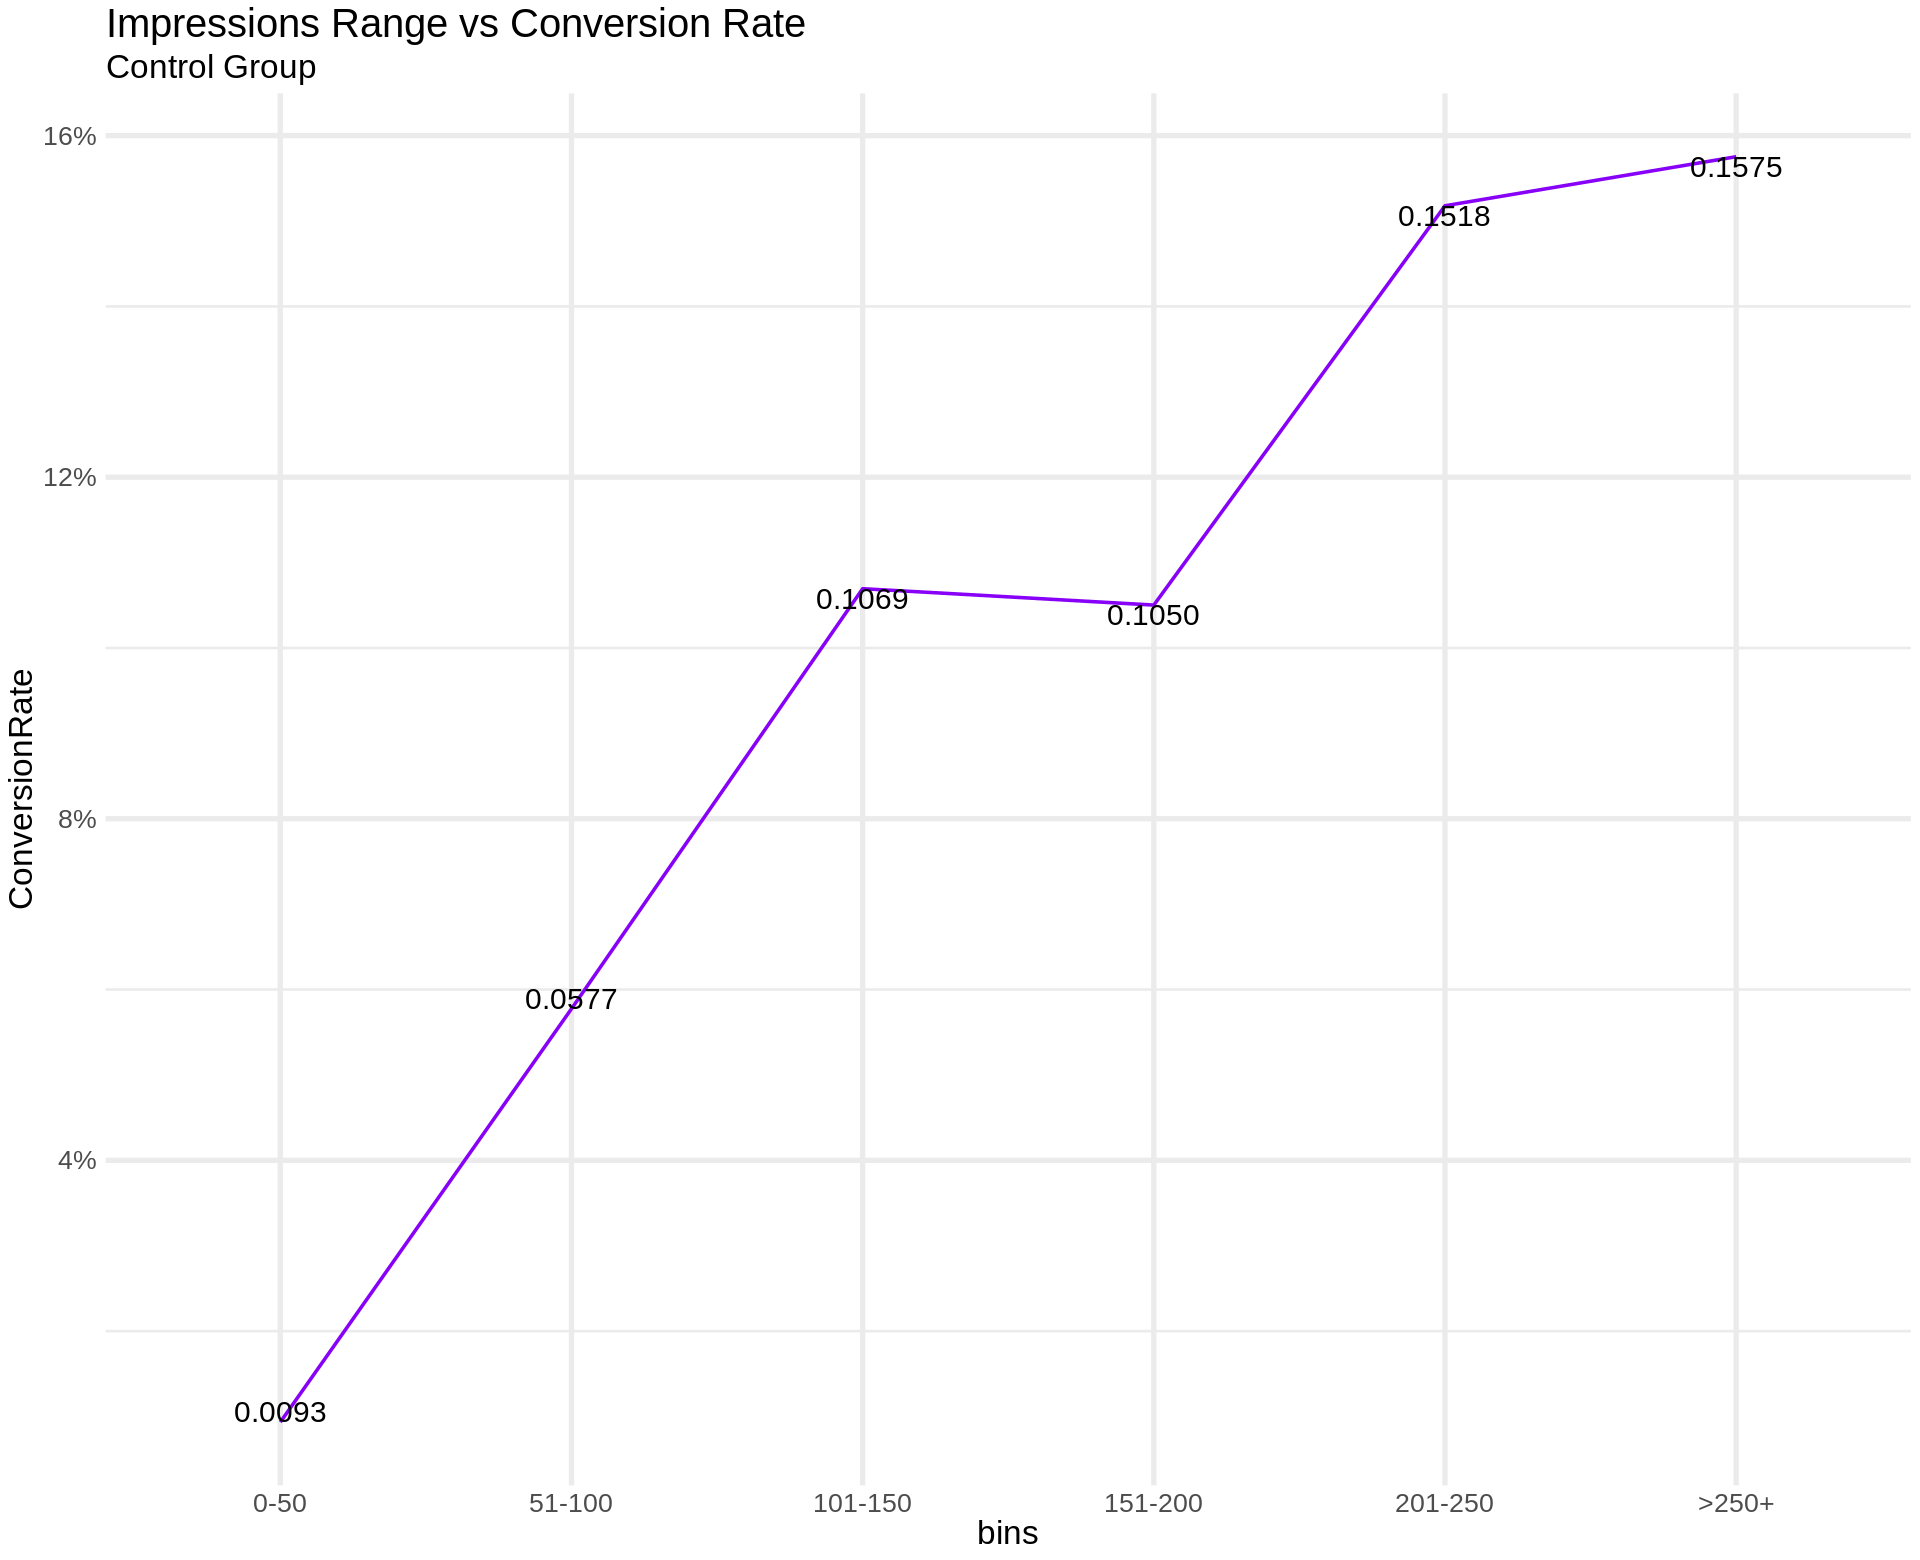

In [30]:
# Plotting Control Group Conversion rates by Impressions

p6 <- ggplot(control_df) +
  geom_line(aes(x = bins, y = ConversionRate), size = 1, color = "#8700F7", group = 1) +
  geom_text(aes(x = bins, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "inward", size=6.3) +
  labs(title = "Impressions Range vs Conversion Rate", subtitle = "Control Group") +
  theme_minimal()+ scale_y_continuous(labels=scales::percent) + theme(text = element_text(size = 20), element_line(size = 1.5))

p6

#### In the below graphs, we can also see that there's a higher amount of conversions that occur at the beginning of the week on Monday and Tuesday, versus the other days of the week.

#### we can also see that most conversions took place between 12-4pm, assuming the data in the data set properly accounted for varying time zones.

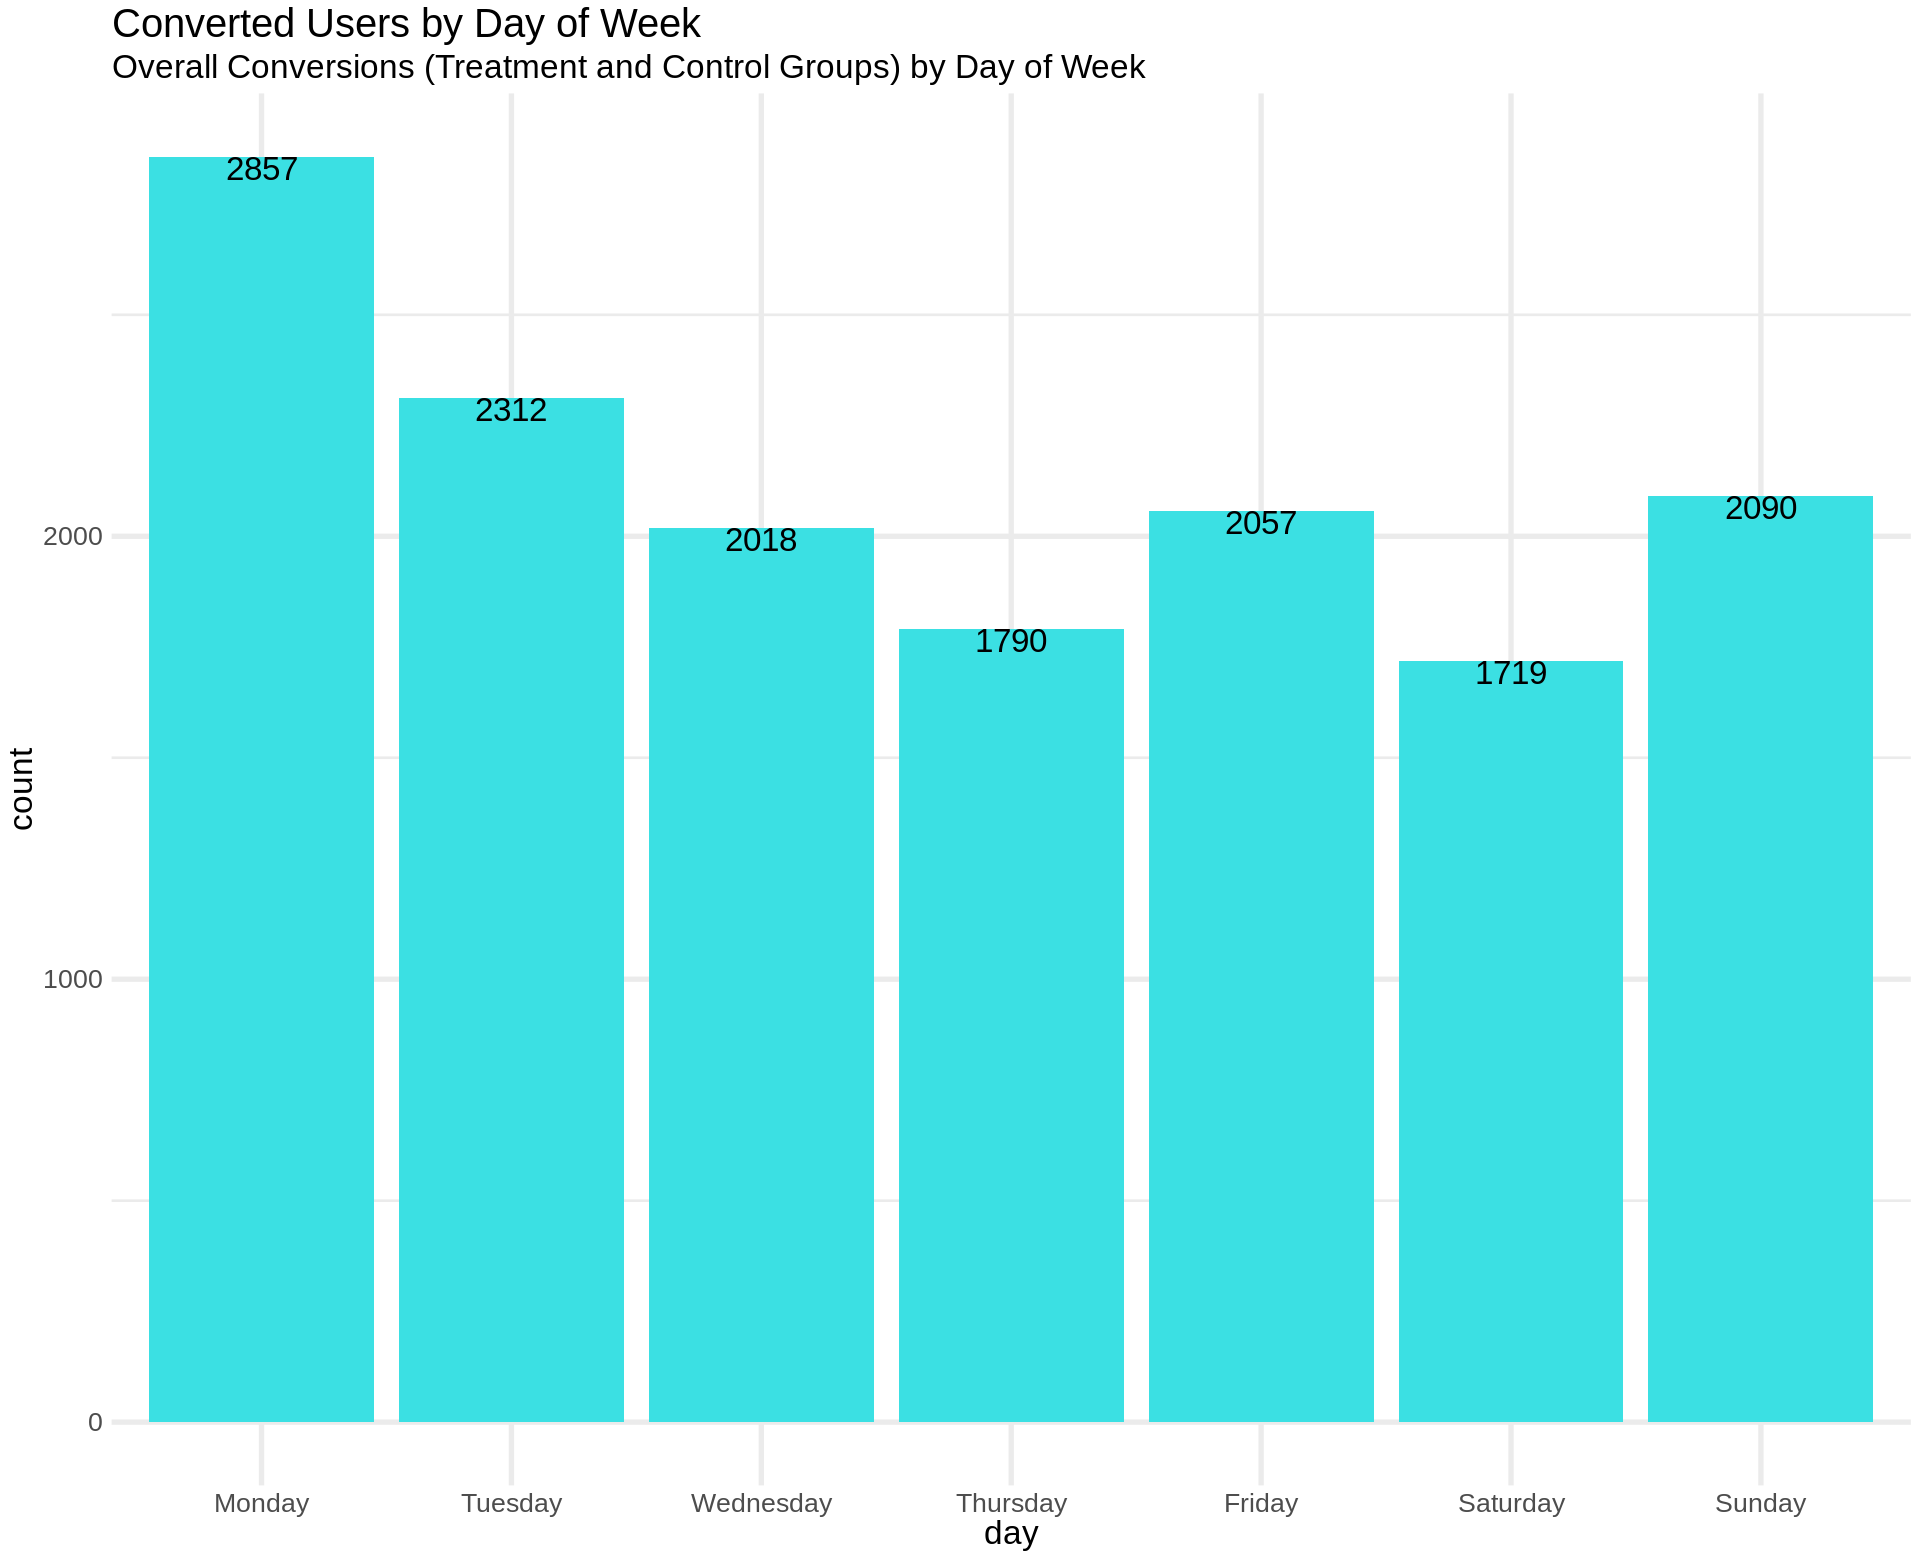

In [31]:
# Overall Converted Users by Day of Week
p7 <- df %>%
  filter(conv_title %in% "Converted") %>%
  ggplot() +
  aes(x = day) +
  geom_bar(fill = "#3BE0E3") +
  geom_text(stat = "count", aes(label=after_stat(count)), vjust = "inward", size=7) +
  labs(title = "Converted Users by Day of Week", subtitle = "Overall Conversions (Treatment and Control Groups) by Day of Week") + 
  theme_minimal()+ theme(text = element_text(size = 20), element_line(size = 1.5))

p7


Warning message:
“Removed 420 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 420 rows containing non-finite values (stat_count).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


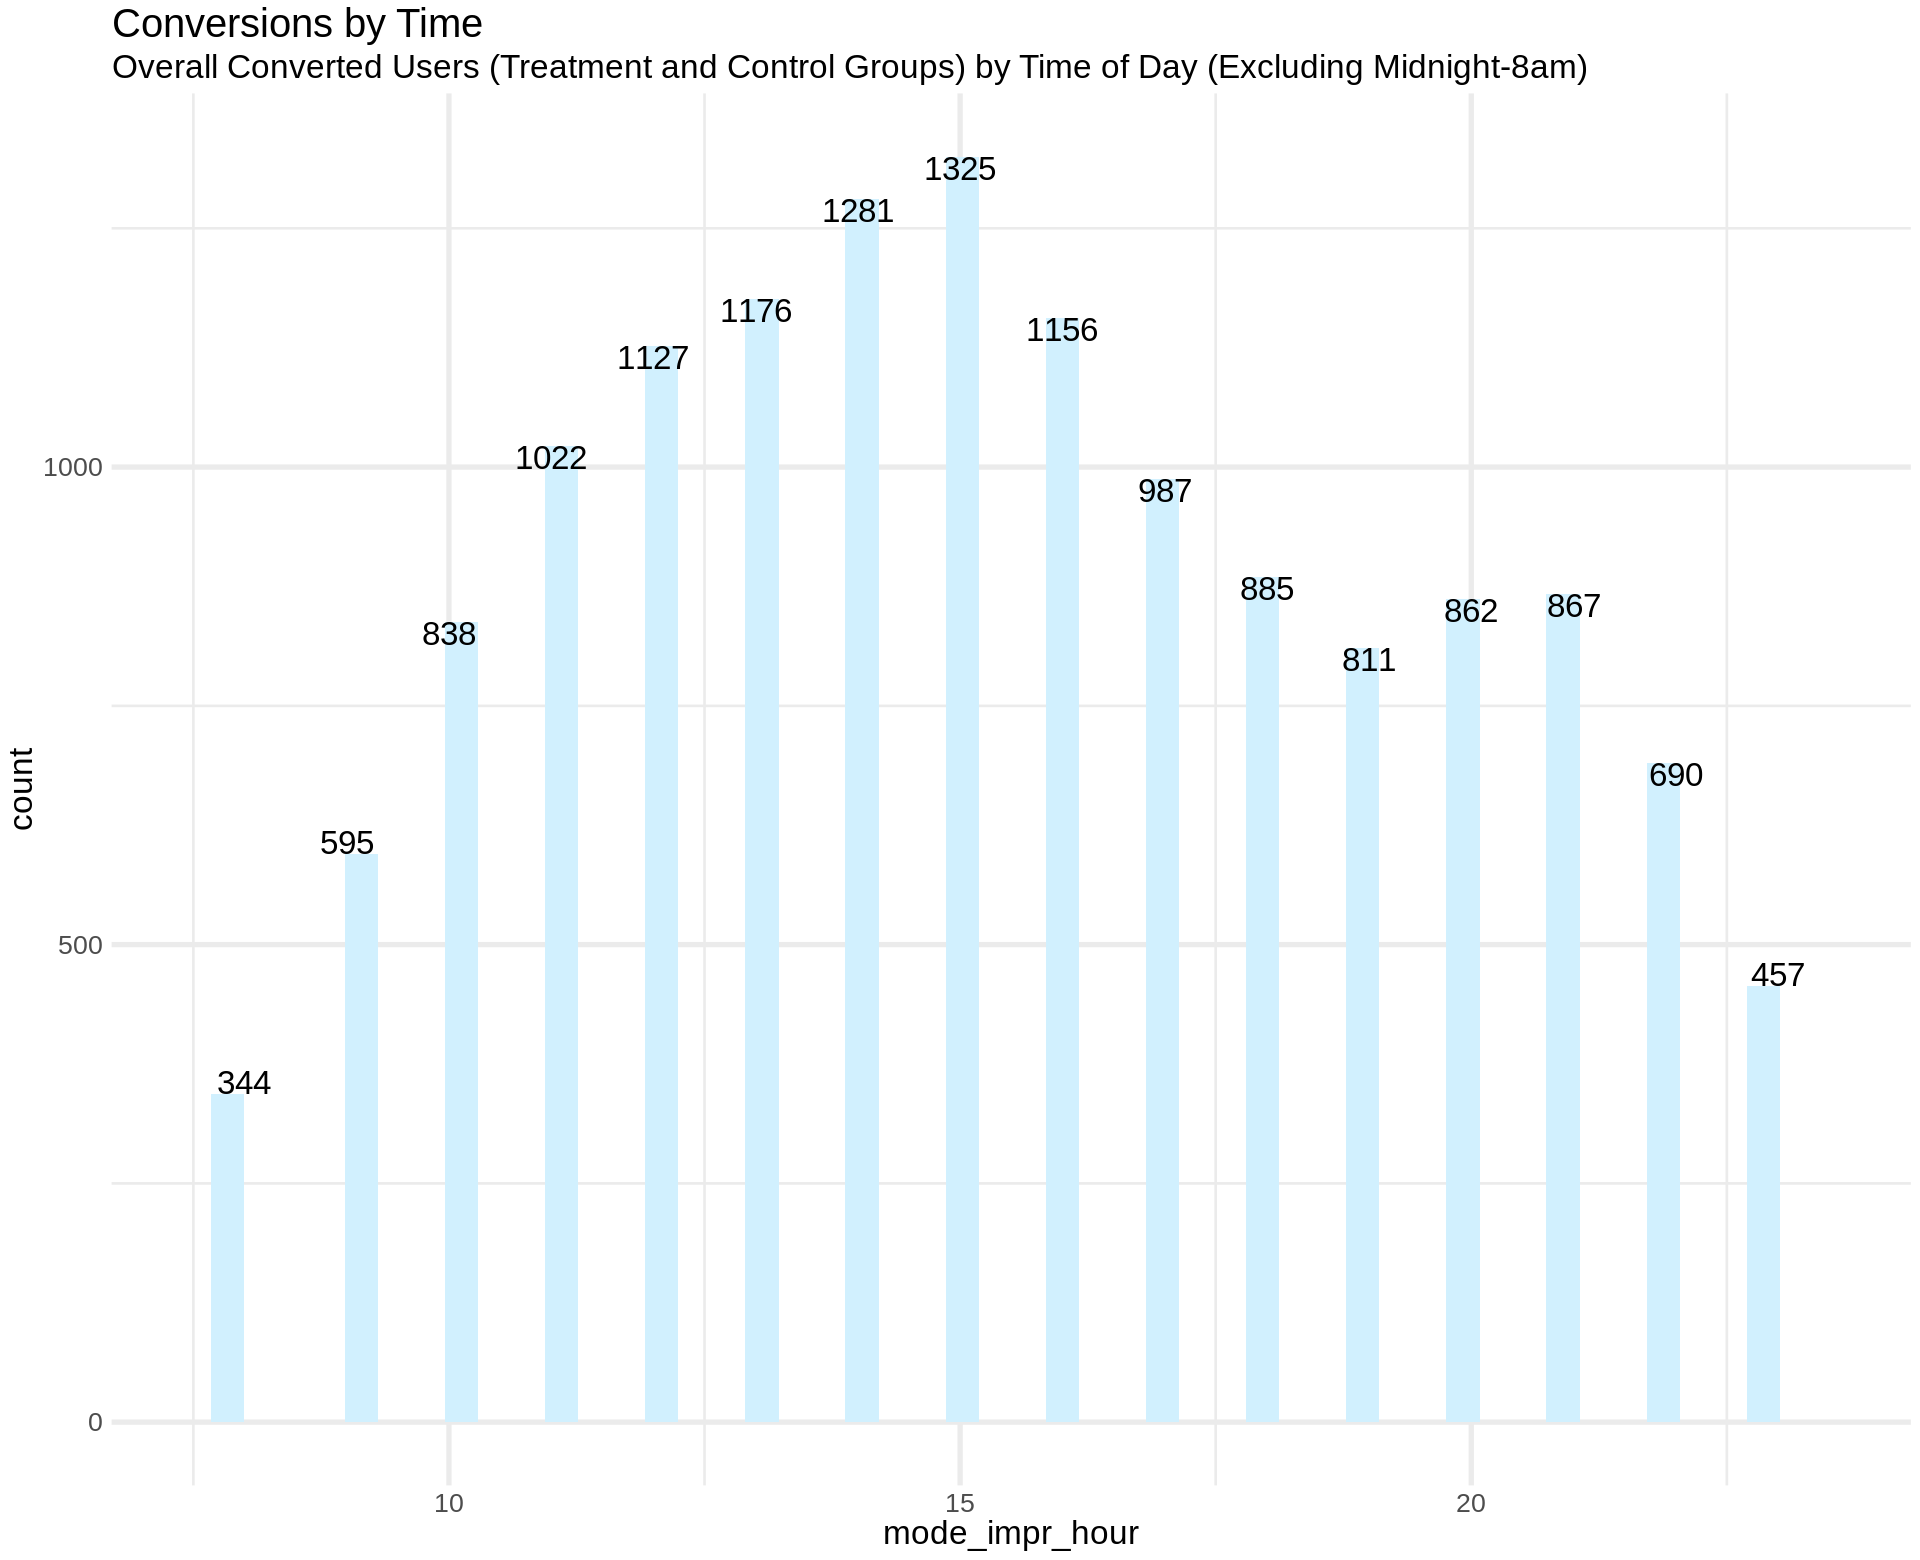

In [32]:
# Plotting Overall Conversions by Time of Day

df %>%
  filter(conv_title %in% "Converted") %>%
  ggplot() +
  aes(x = mode_impr_hour) +
  geom_histogram(bins = 50L, fill = "#D1F0FE") +
  geom_text(stat = "count", aes(label=after_stat(count)), vjust = "inward", size=7) +
  labs(title = "Conversions by Time", subtitle = "Overall Converted Users (Treatment and Control Groups) by Time of Day (Excluding Midnight-8am)") +
  theme_minimal() + xlim(7.5L, 23.5L) + theme(text = element_text(size = 20), element_line(size = 1.5))



Warning message:
“Removed 420 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 420 rows containing non-finite values (stat_boxplot).”


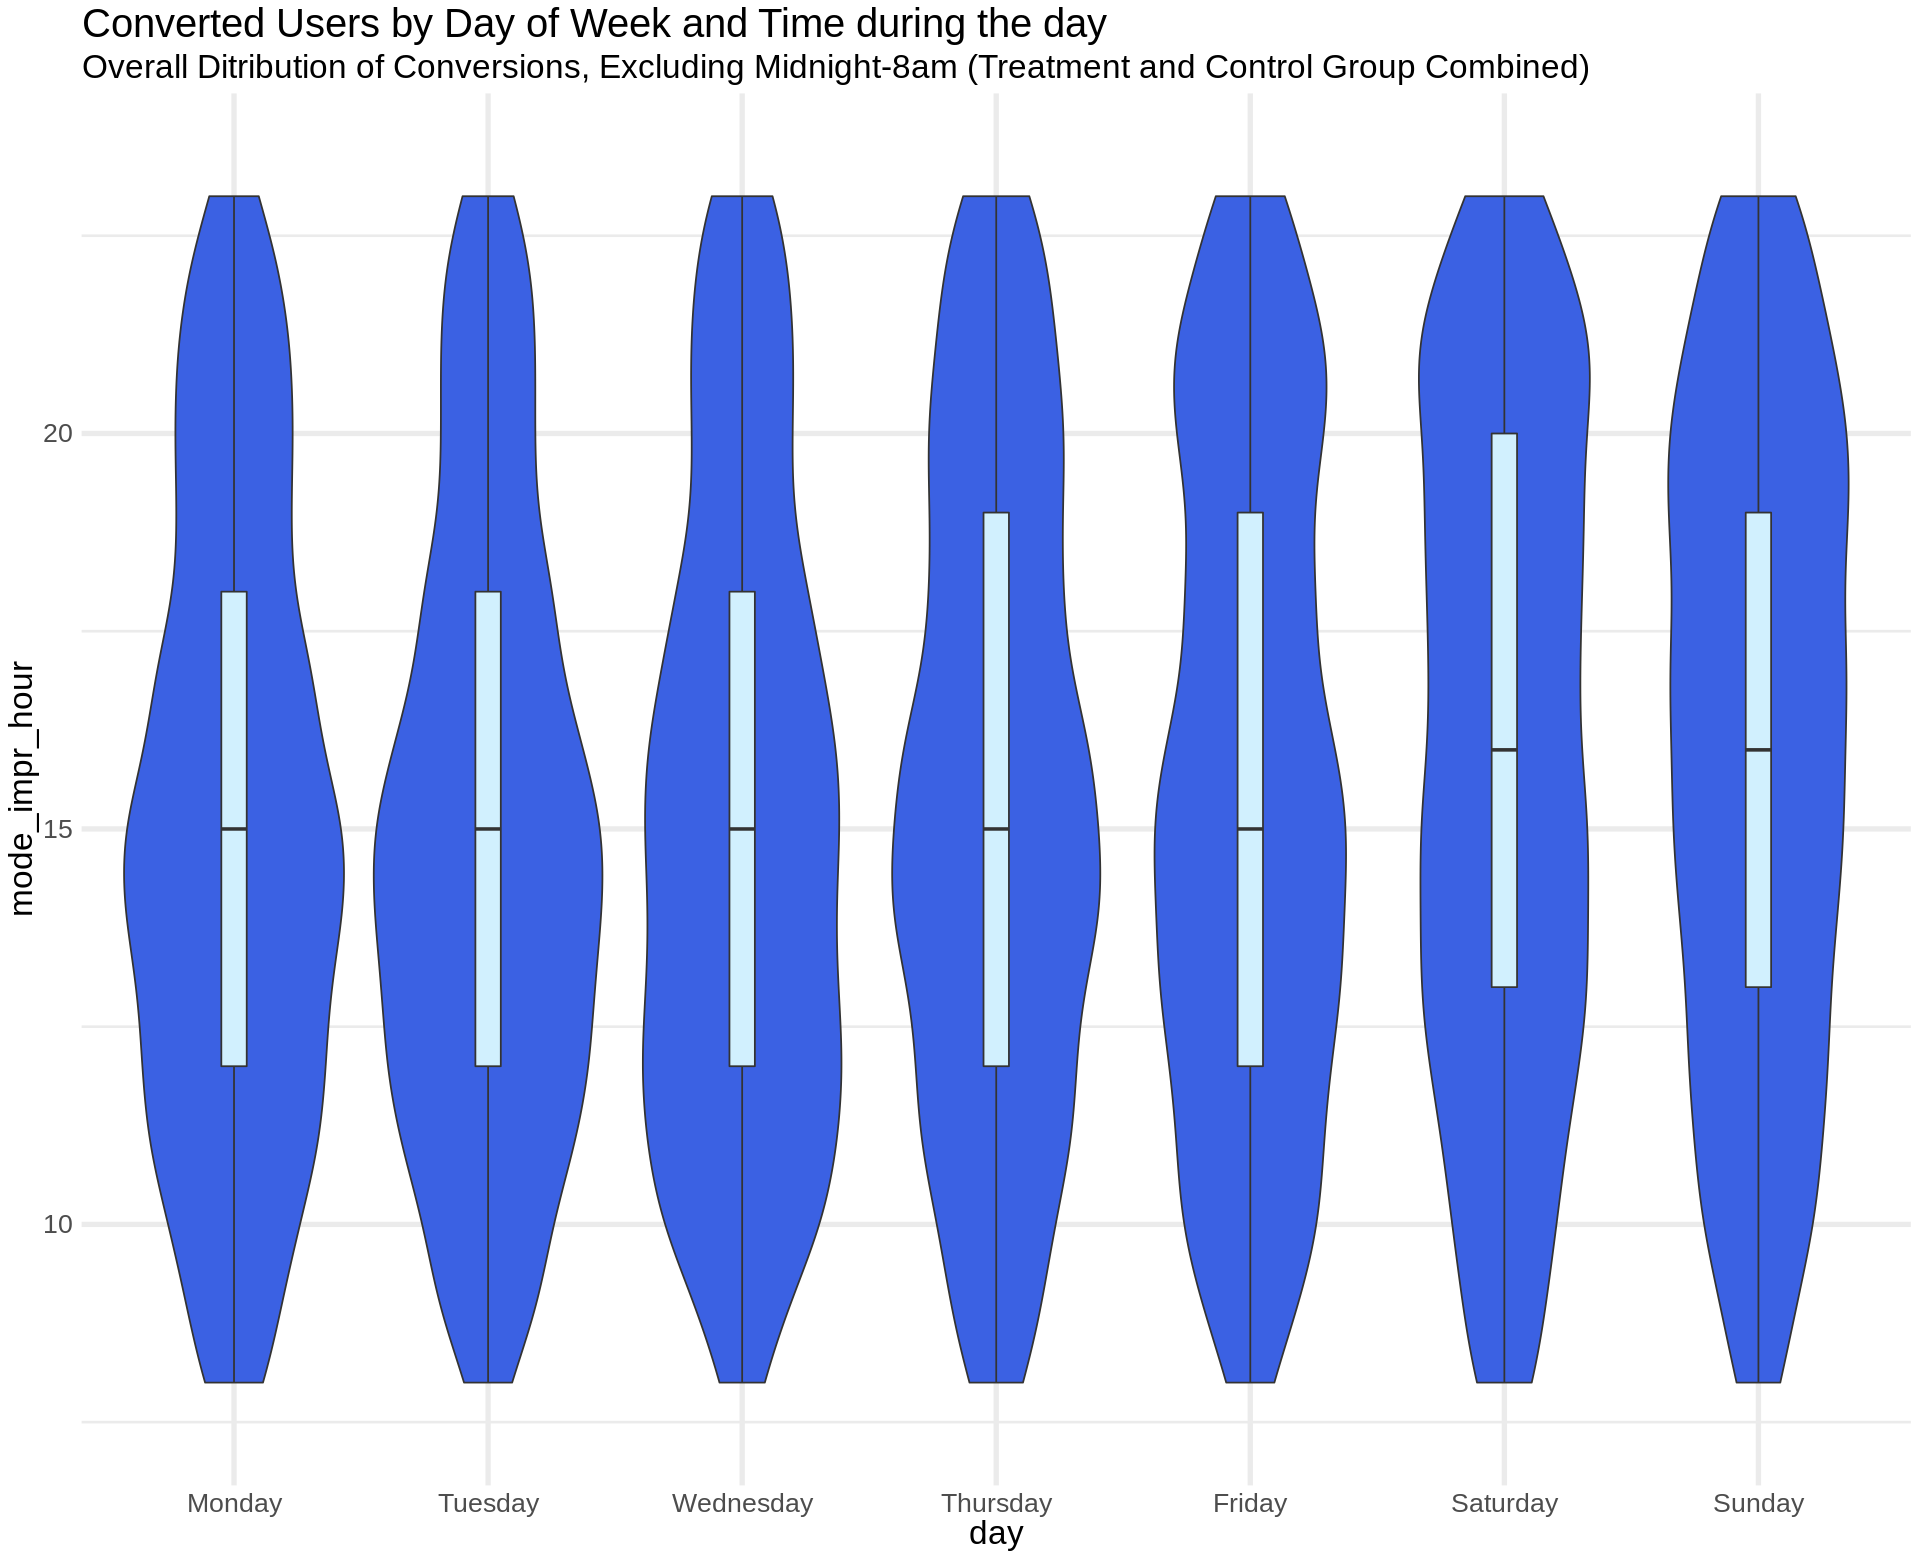

In [33]:
# Plotting Distribution/Boxplots of Overall Converted users by Day of Week x Time of Day
p8<-df %>%
  filter(conv_title %in% "Converted") %>%
  ggplot() +
  aes(x = day, y = mode_impr_hour) +
  geom_violin(fill = "#3B61E3") +  geom_boxplot(fill = "#D1F0FE", width=.1)+
  labs(title = "Converted Users by Day of Week and Time during the day", subtitle = "Overall Ditribution of Conversions, Excluding Midnight-8am (Treatment and Control Group Combined)") +
  theme_minimal() + ylim(7.5L, 23.5L) + theme(text = element_text(size = 20), element_line(size = 1.5))


p8


## Analysis of Treatment and Control Group by Day of week and Hour of Day

#### In the below graphs, I review the treatment and control groups individually, to see if there are any unique differences in terms of time of day or day of week, which effect one group more than the other.

## Treatment Group Analysis


#### In the below charts, it can be seen that Monday and Tuesday remain the highest conversion days for the treatment group. In addition, it can be seen that Monday has the highest impression per conversion ratio.

#### As for the times of day, it appears that the rate of impressions per conversion are lowest at 2-6pm and then again at 8-11pm, which indicate that users are more receptive to converting during those times.

In [34]:
# Create Day of Week Analysis Dataframe
exposed_wk<- group_by(exposed, day)
exposed_wk_df<- summarise(exposed_wk, Users = n(), Conversions = sum(converted), Total_Impressions = sum(tot_impr))


# Calculate the conversion rate which is percentage of users converted in the impression range
exposed_wk_df$ConversionRate <- (exposed_wk_df$Conversions / exposed_wk_df$Users) 

# Calculate the no. of impressions served per conversion in the same impression ranges
exposed_wk_df$Impressions_by_conversions <- exposed_wk_df$Total_Impressions / exposed_wk_df$Conversions


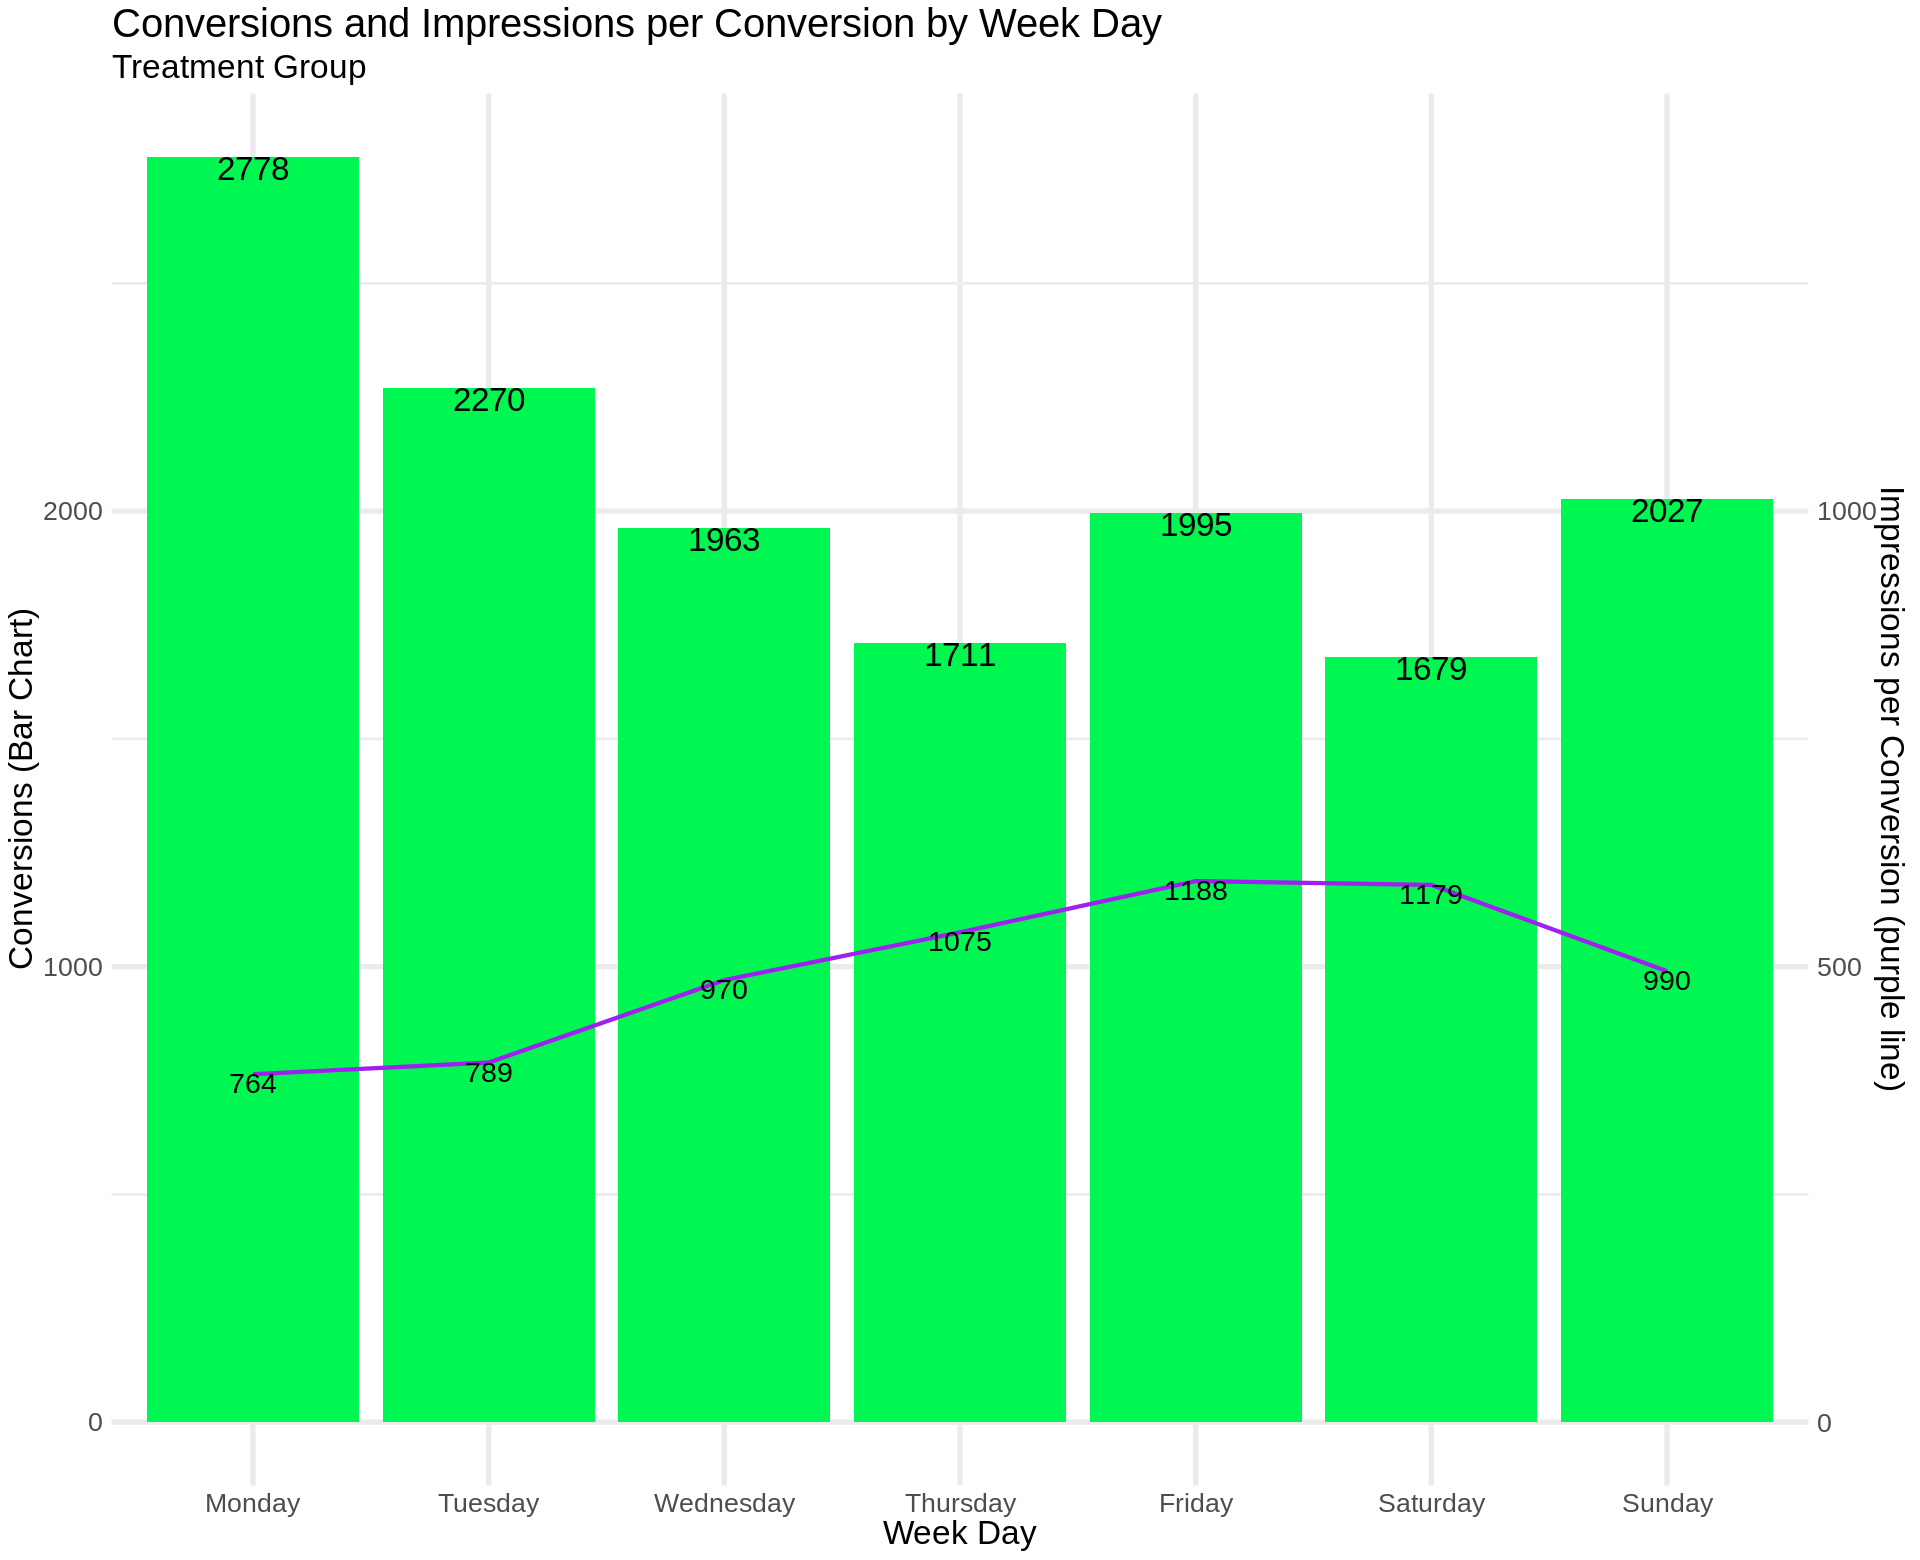

In [35]:
# Plot of Conversions and Impressions per Conversion by Week Day
ggplot(exposed_wk_df) +
  aes(x = day, weight = Conversions) +
  geom_bar(fill = "#00F752") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward", size=7) +
  geom_line(aes(x = day, y = Impressions_by_conversions), size = 1.2, color = "purple", group = 1) +
  scale_y_continuous(name = "Conversions (Bar Chart)", sec.axis = sec_axis(~ . / 2, name = "Impressions per Conversion (purple line)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "outward", size=6) +
  labs(title = "Conversions and Impressions per Conversion by Week Day", subtitle = "Treatment Group", x = "Week Day", y = "Conversions") +
  theme_minimal()+ theme(text = element_text(size = 20), element_line(size = 1.5))

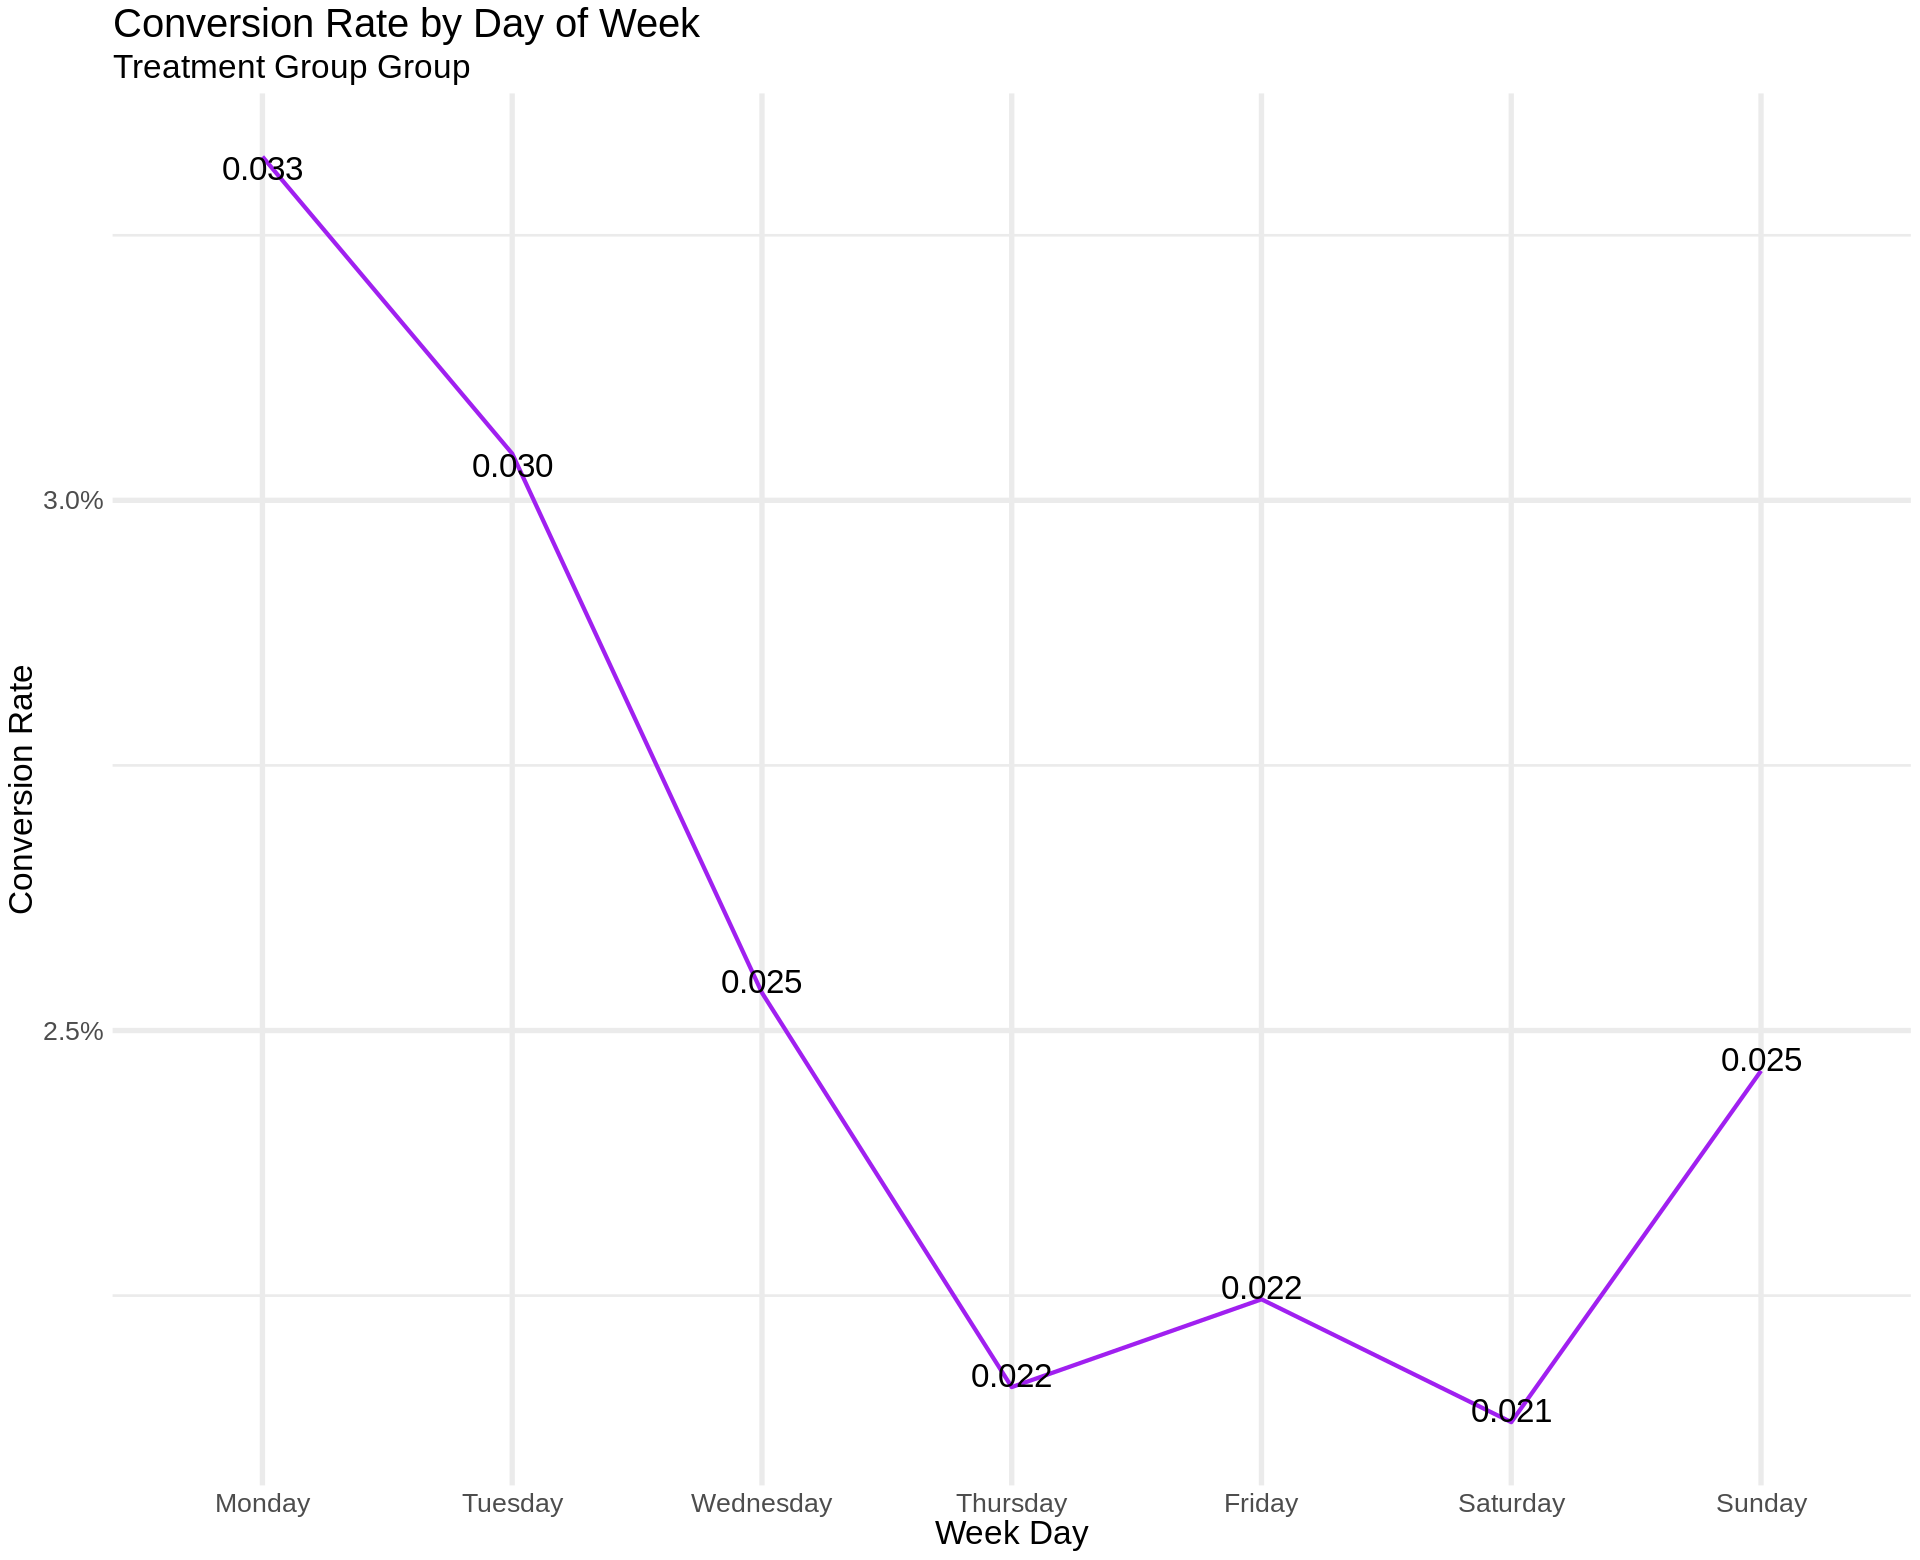

In [36]:
#Plotting Conversion rate By Day of Week

ggplot(exposed_wk_df) +
  aes(x = day, weight = ConversionRate) +
  geom_line(aes(x = day, y = ConversionRate), size = 1.2, color = "purple", group = 1) +
  geom_text(aes(x = day, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "inward", size=7) +
  labs(title = "Conversion Rate by Day of Week", subtitle = "Treatment Group Group", x = "Week Day", y = "Conversion Rate") +
  theme_minimal() + scale_y_continuous(labels=scales::percent) + theme(text = element_text(size = 20), element_line(size = 1.5)) 


In [37]:
# Create Time Analysis Dataframe
exposed_time <- group_by(exposed, mode_impr_hour)
exposed_time_df <- summarise(exposed_time  , Users = n(), Conversions = sum(converted), Total_Impressions = sum(tot_impr))

# Calculate the conversion rate which is percentage of users converted in the impression range
exposed_time_df$ConversionRate <- (exposed_time_df$Conversions / exposed_time_df$Users) 

# Calculate the no. of impressions served per conversion in the same impression ranges
exposed_time_df$Impressions_by_conversions <- exposed_time_df$Total_Impressions / exposed_time_df$Conversions


Warning message:
“Removed 8 rows containing non-finite values (stat_count).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”


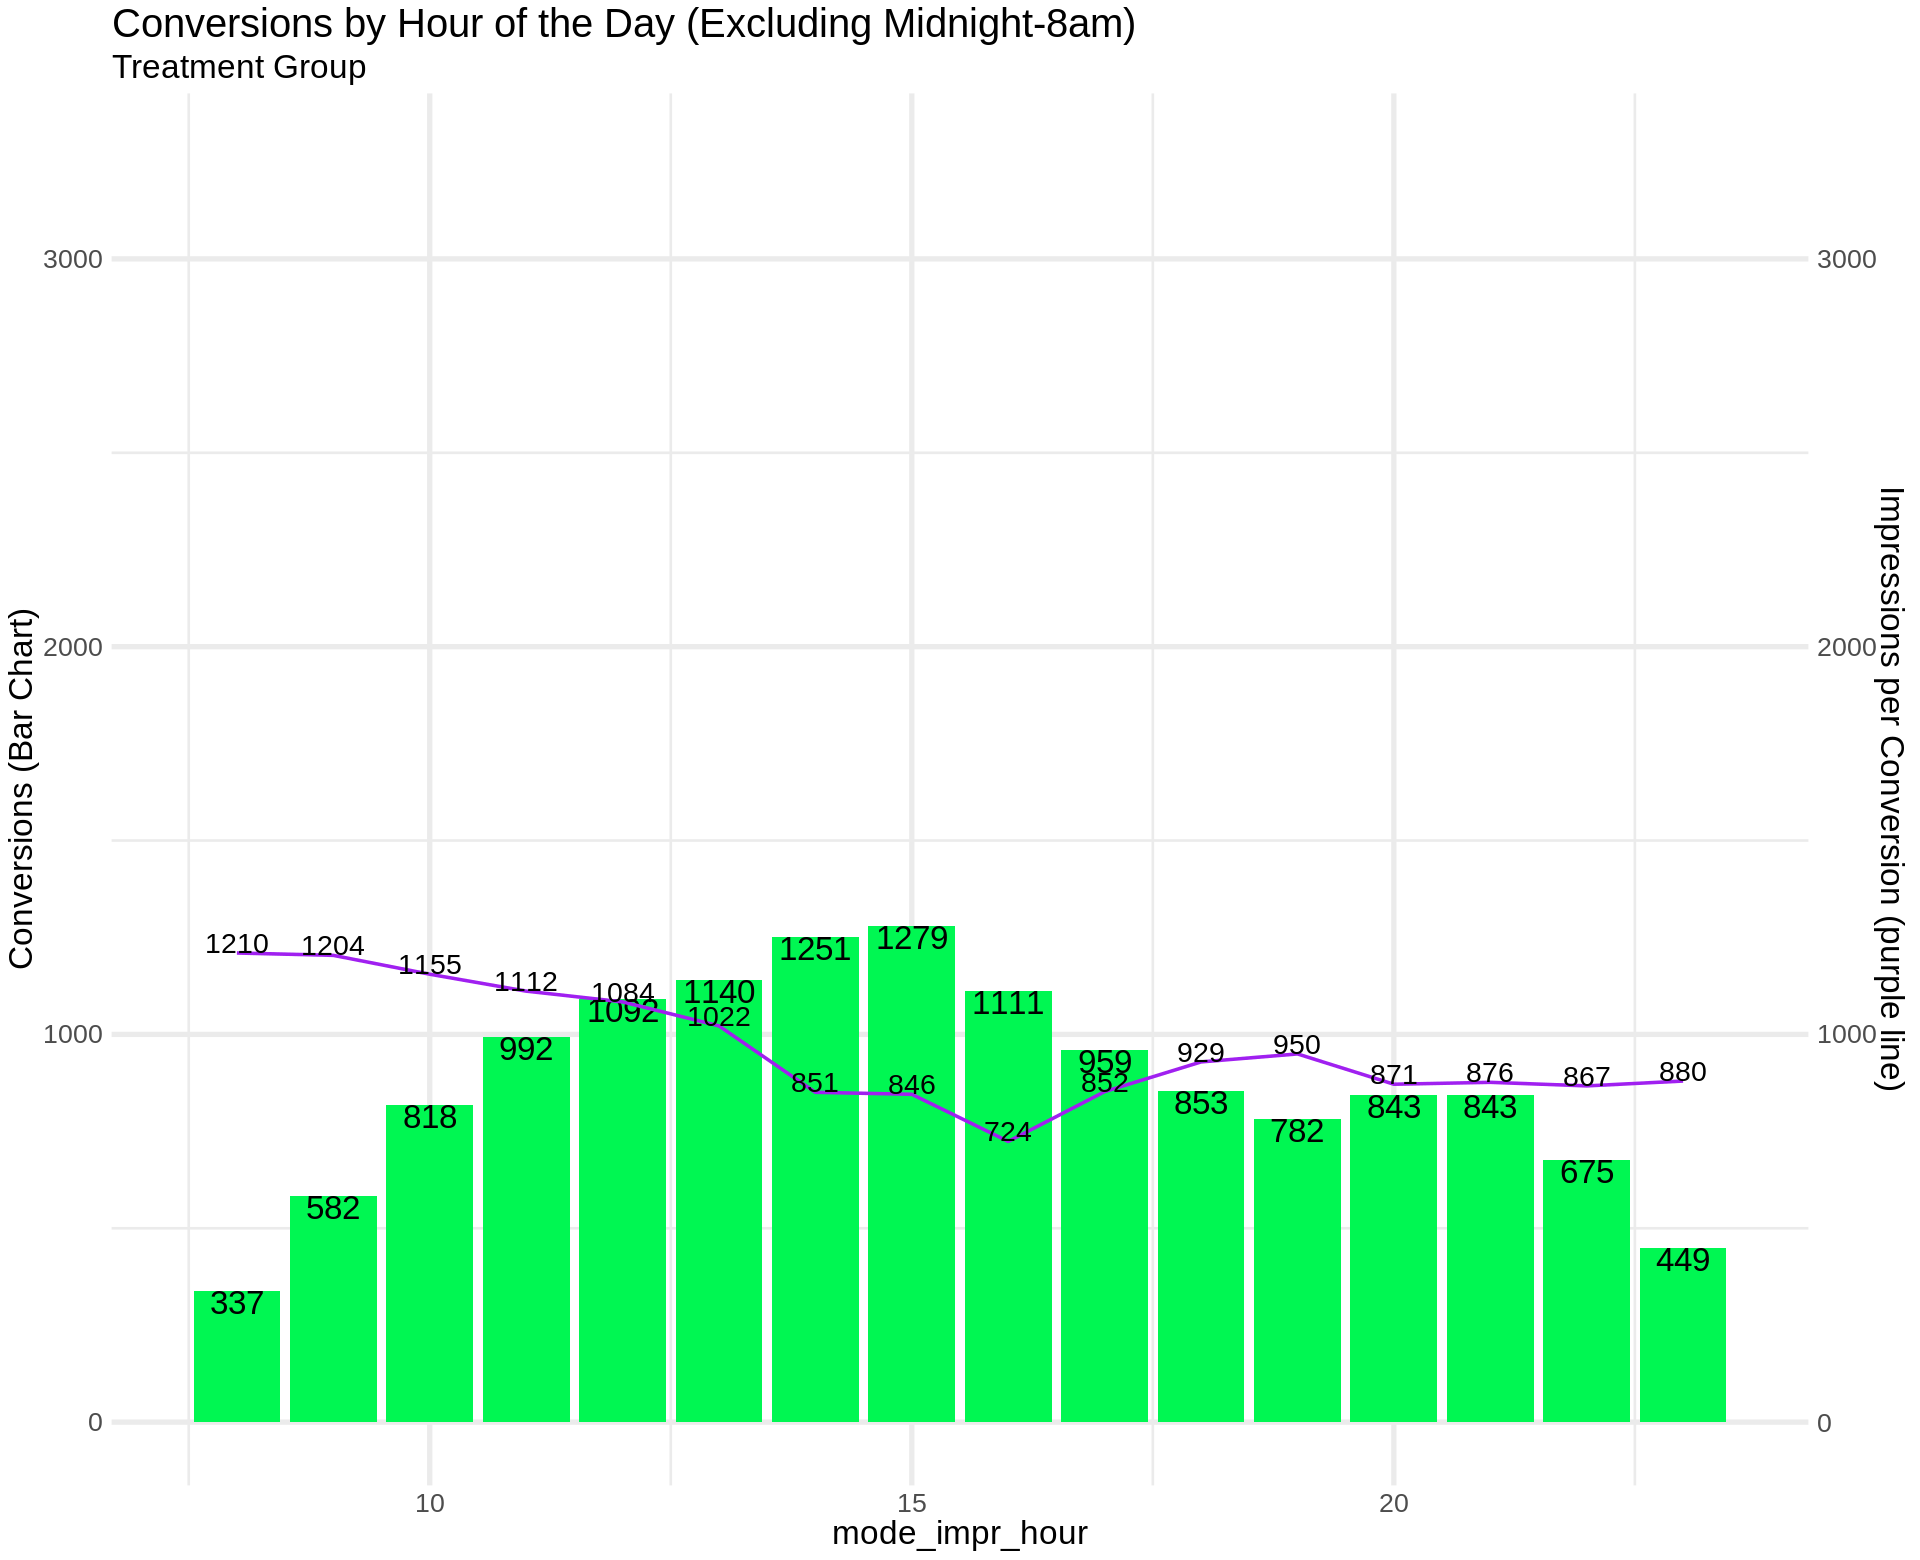

In [38]:
# Plot of Conversions x Impressions per Conversion by Treatment Group by Hour of Day (Excluding Midnight-8am)
ggplot(exposed_time_df) +
  aes(x = mode_impr_hour, weight = Conversions) +
  geom_bar(fill = "#00F752") +
  geom_text(aes(y = Conversions, label = Conversions), vjust ="outward", size=7) +
  geom_line(aes(x = mode_impr_hour, y = Impressions_by_conversions), size = 1, color = "purple", group = 1) +
  scale_y_continuous(name = "Conversions (Bar Chart)", sec.axis = sec_axis(~ . * 1, name = "Impressions per Conversion (purple line)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "inward", size=6) +
  labs(title = "Conversions by Hour of the Day (Excluding Midnight-8am)", subtitle = "Treatment Group") +
  theme_minimal()+ xlim(7.5L, 23.5L) + theme(text = element_text(size = 20), element_line(size = 1.5)) 


Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”


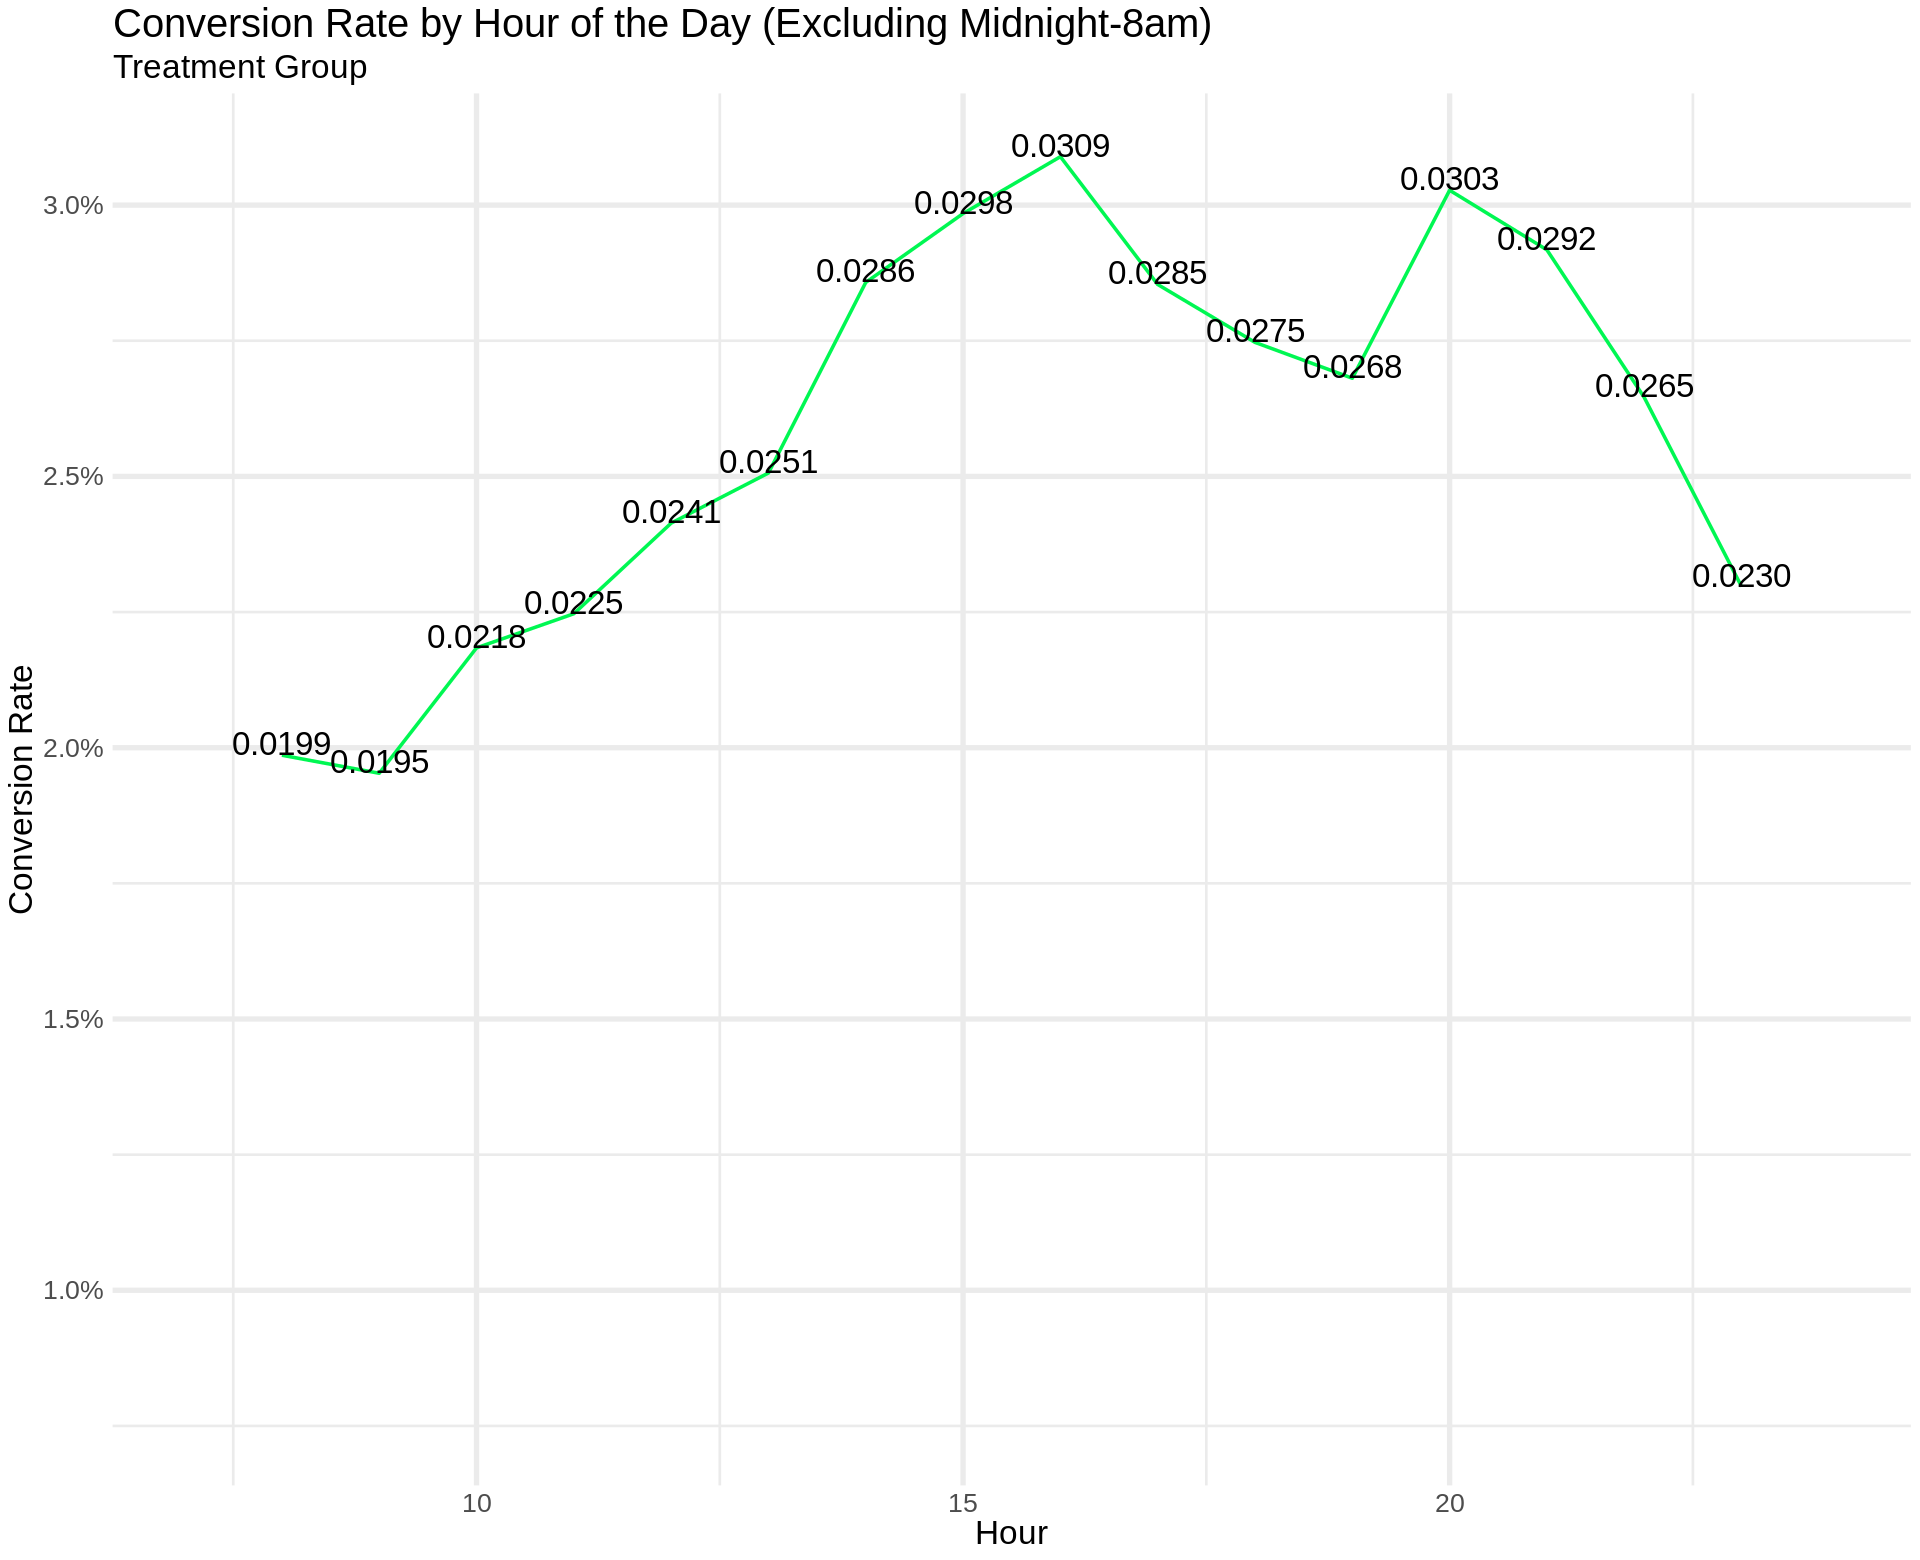

In [39]:
# Plot of Conversion rates by Treatment Group by Hour of Day (Excluding Midnight-8am)
ggplot(exposed_time_df) +
  aes(x = mode_impr_hour, y = ConversionRate) +
  geom_line(size = 1L, colour = "#00F752") +
  geom_text(aes(x = mode_impr_hour, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "outward",size=7) +
  labs(x = "Hour", y = "Conversion Rate", title = "Conversion Rate by Hour of the Day (Excluding Midnight-8am)", subtitle = "Treatment Group") +
  theme_minimal()+ xlim(7.1L, 23.9L) + scale_y_continuous(labels=scales::percent) + theme(text = element_text(size = 20), element_line(size = 1.5)) 


## Control Group Analysis

#### In the below charts, there's no strong differentiating factor between the days, besides that Saturday is the worst performing day for impressions per conversion. Suggesting that consumers convert less over all on Saturday, as this day was also the worst performing for the treatment group.

#### As for the times of day, it appears that the rate of impressions per conversion are similar to the treatment group, in that the best performing time is between 3-6pm. However, there's no benefit seen later in the evening, suggesting that advertising encourages more conversions late at night for this product.  

In [40]:
# Create Day of Week Analysis Dataframe
control_wk<- group_by(control, day)
control_wk_df<- summarise(control_wk, Users = n(), Conversions = sum(converted), Total_Impressions = sum(tot_impr))

# Calculate the conversion rate which is percentage of users converted in the impression range
control_wk_df$ConversionRate <- (control_wk_df$Conversions / control_wk_df$Users) 

# Calculate the no. of impressions served per conversion in the same impression ranges
control_wk_df$Impressions_by_conversions <- control_wk_df$Total_Impressions / control_wk_df$Conversions

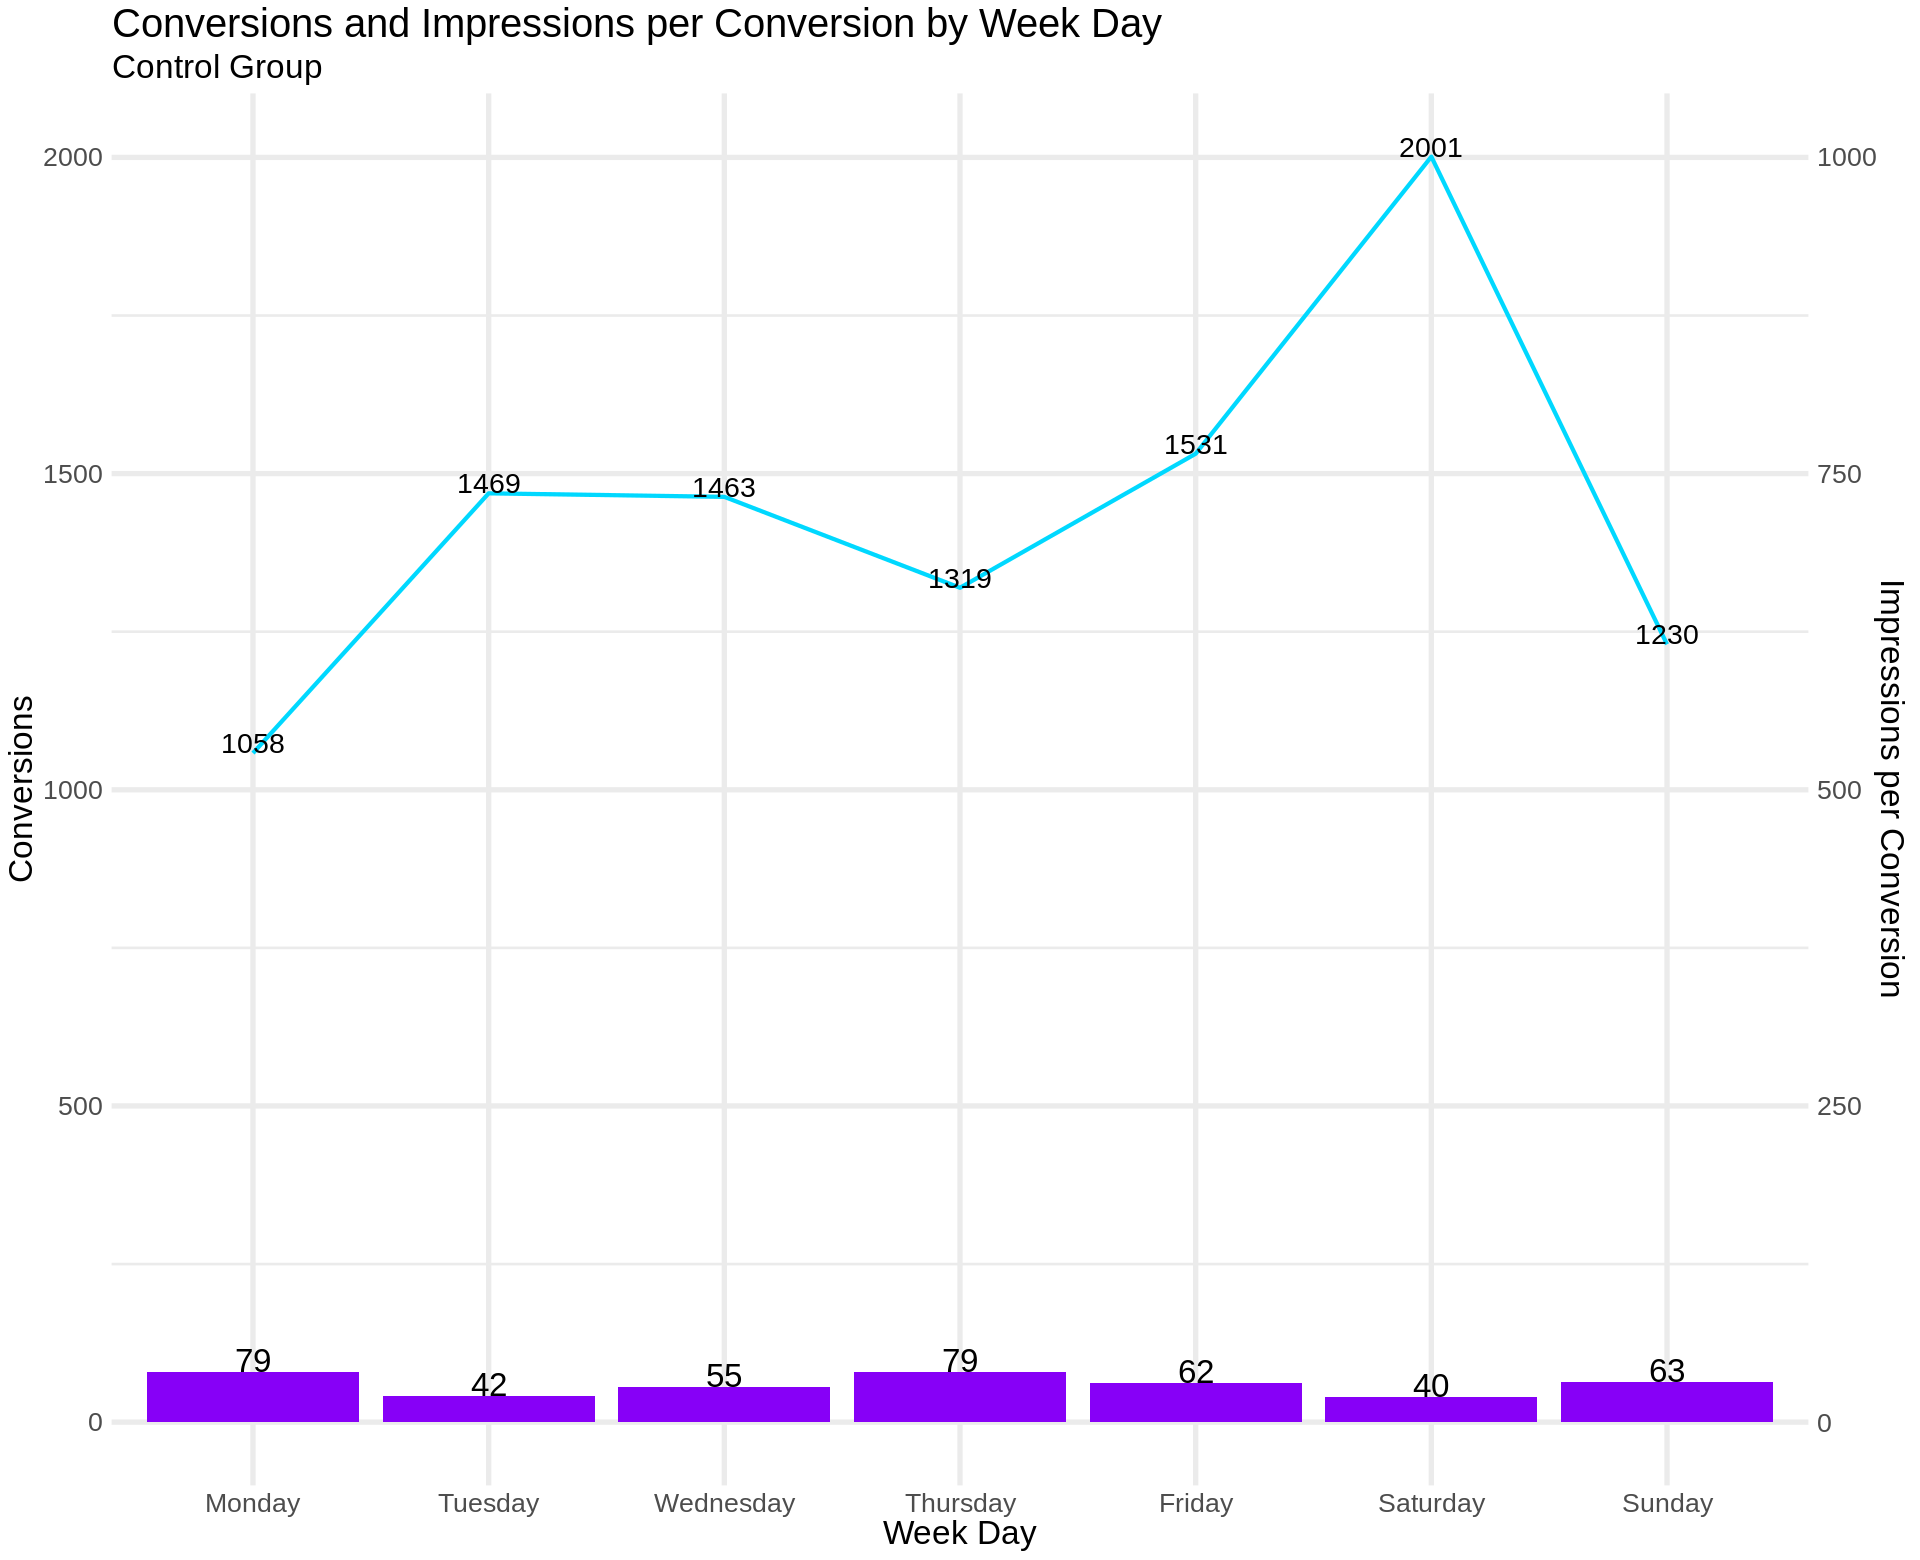

In [41]:
# plot of Conversions and Impressions per Conversion by Week Day
ggplot(control_wk_df) +
  aes(x = day, weight = Conversions) +
  geom_bar(fill = "#8700F7") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward",size=7) +
  geom_line(aes(x = day, y = Impressions_by_conversions), size = 1.2, color = "#00D8FF", group = 1) +
  scale_y_continuous(name = "Conversions", sec.axis = sec_axis(~ . / 2, name = "Impressions per Conversion")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "outward",size=6) +
  labs(title = "Conversions and Impressions per Conversion by Week Day ", subtitle = "Control Group", x = "Week Day", y = "Conversions") +
  theme_minimal()+ theme(text = element_text(size = 20), element_line(size = 1.5))


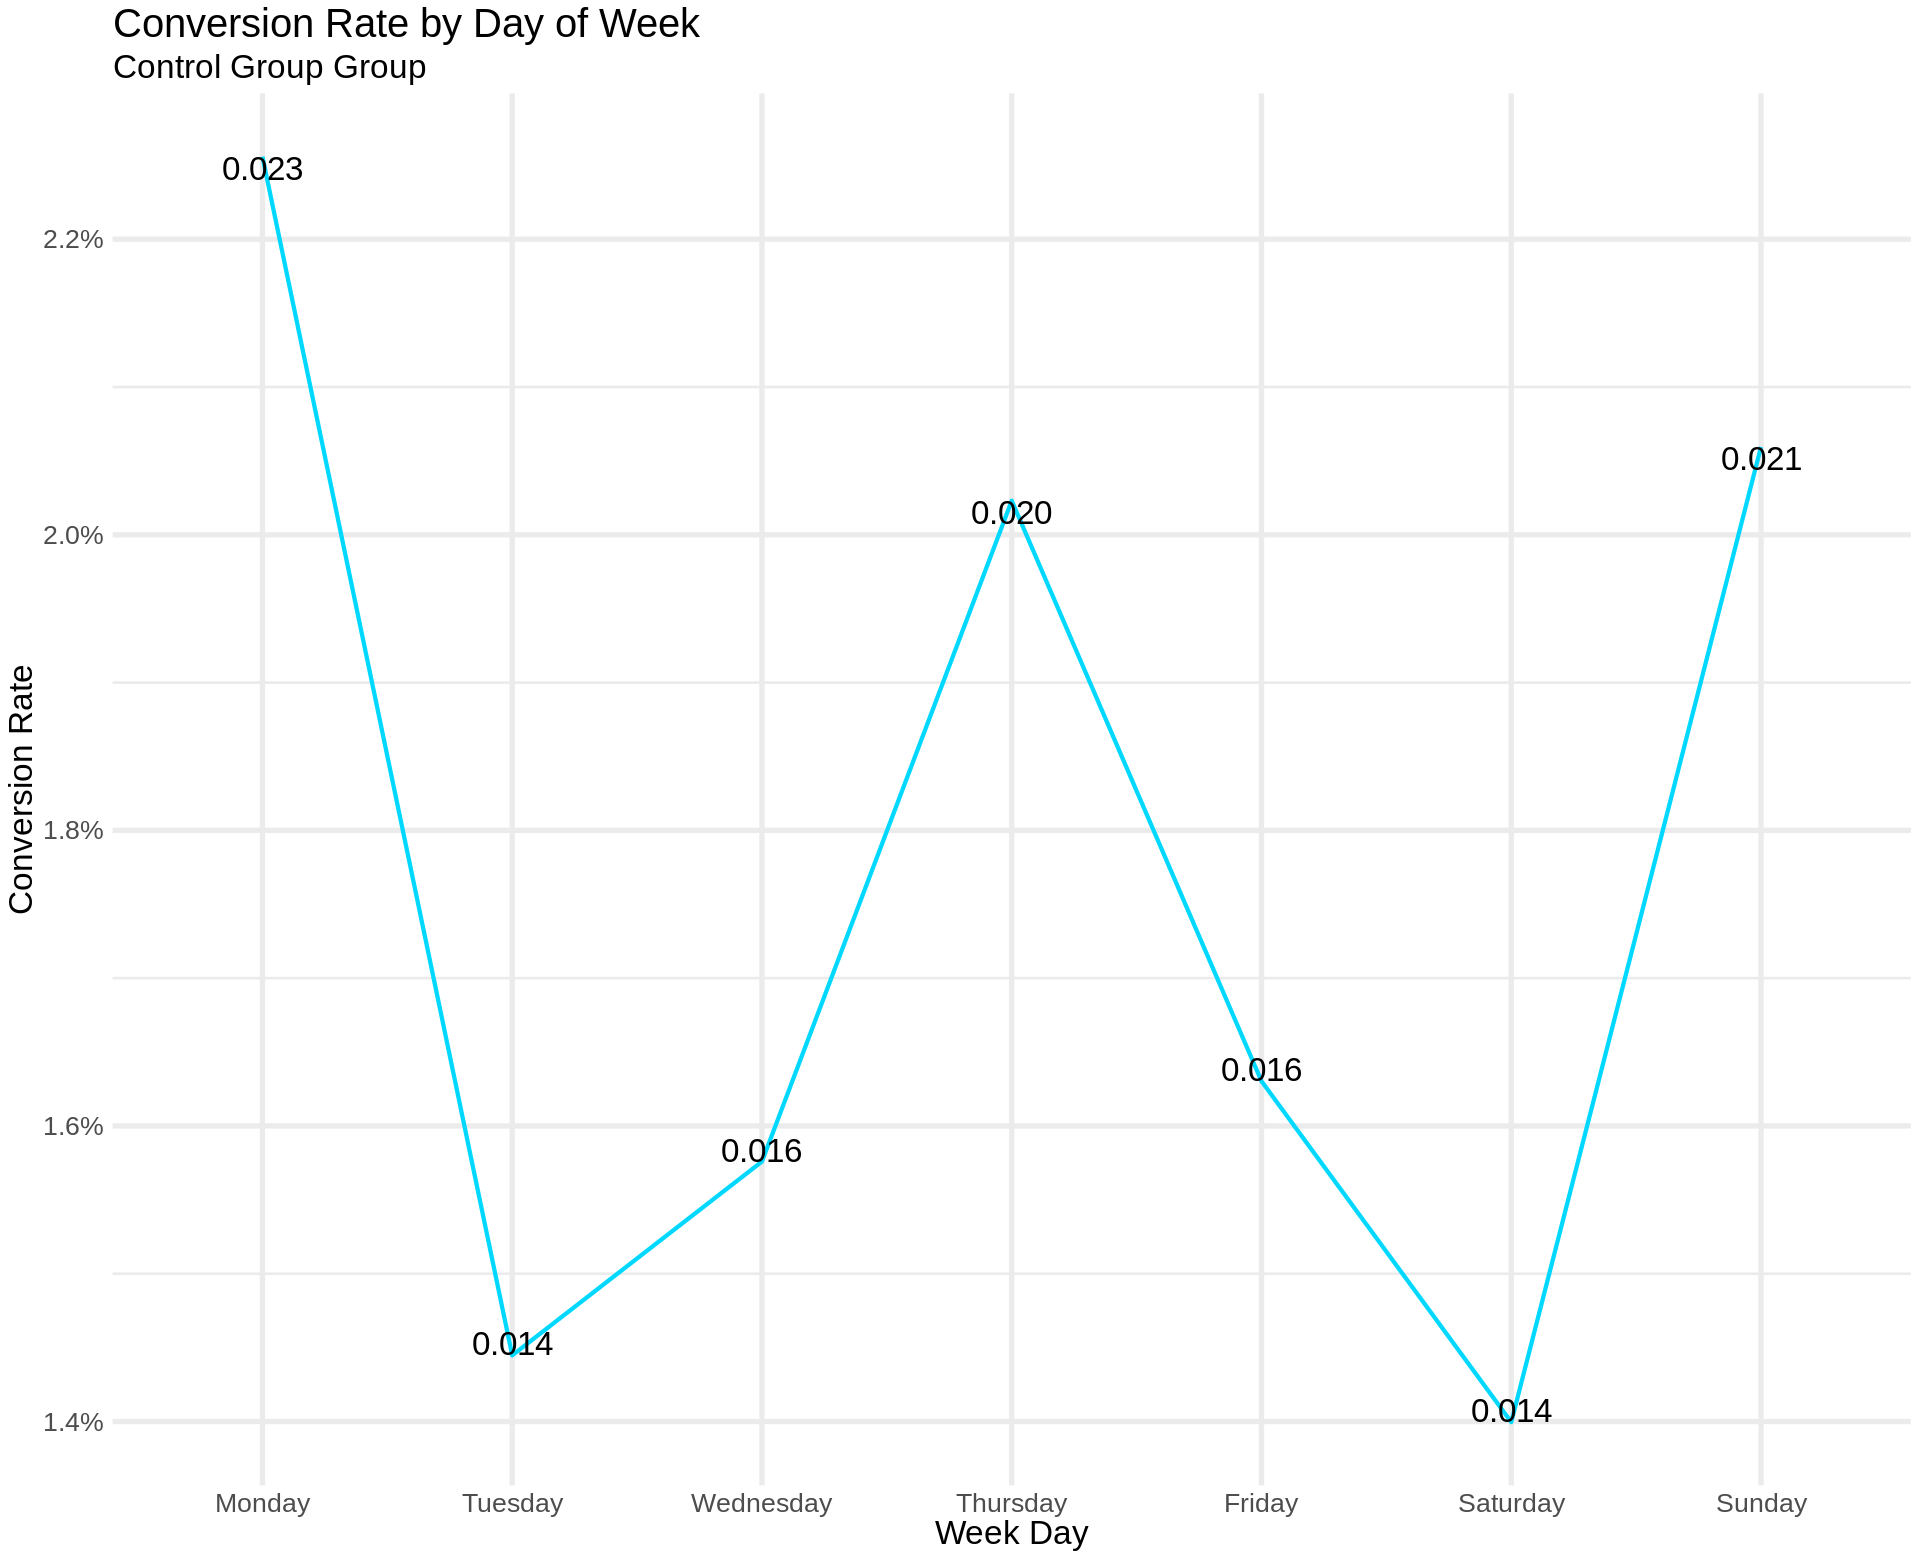

In [42]:
#Plotting Conversion rate By Day of Week

ggplot(control_wk_df) +
  aes(x = day, weight = ConversionRate) +
  geom_line(aes(x = day, y = ConversionRate), size = 1.2, color = "#00D8FF", group = 1) +
  geom_text(aes(x = day, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "inward",size=7) +
  labs(title = "Conversion Rate by Day of Week", subtitle = "Control Group Group", x = "Week Day", y = "Conversion Rate") +
  theme_minimal()+ scale_y_continuous(labels=scales::percent)+ theme(text = element_text(size = 20), element_line(size = 1.5)) 



In [43]:
# Create Time Analysis Dataframe
control_time <- group_by(control, mode_impr_hour)
control_time_df <- summarise(control_time  , Users = n(), Conversions = sum(converted), Total_Impressions = sum(tot_impr))

# Calculate the conversion rate which is percentage of users converted in the impression range
control_time_df$ConversionRate <- (control_time_df$Conversions / control_time_df$Users) 

# Calculate the no. of impressions served per conversion in the same impression ranges
control_time_df$Impressions_by_conversions <- control_time_df$Total_Impressions / control_time_df$Conversions


Warning message:
“Removed 8 rows containing non-finite values (stat_count).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”
Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”


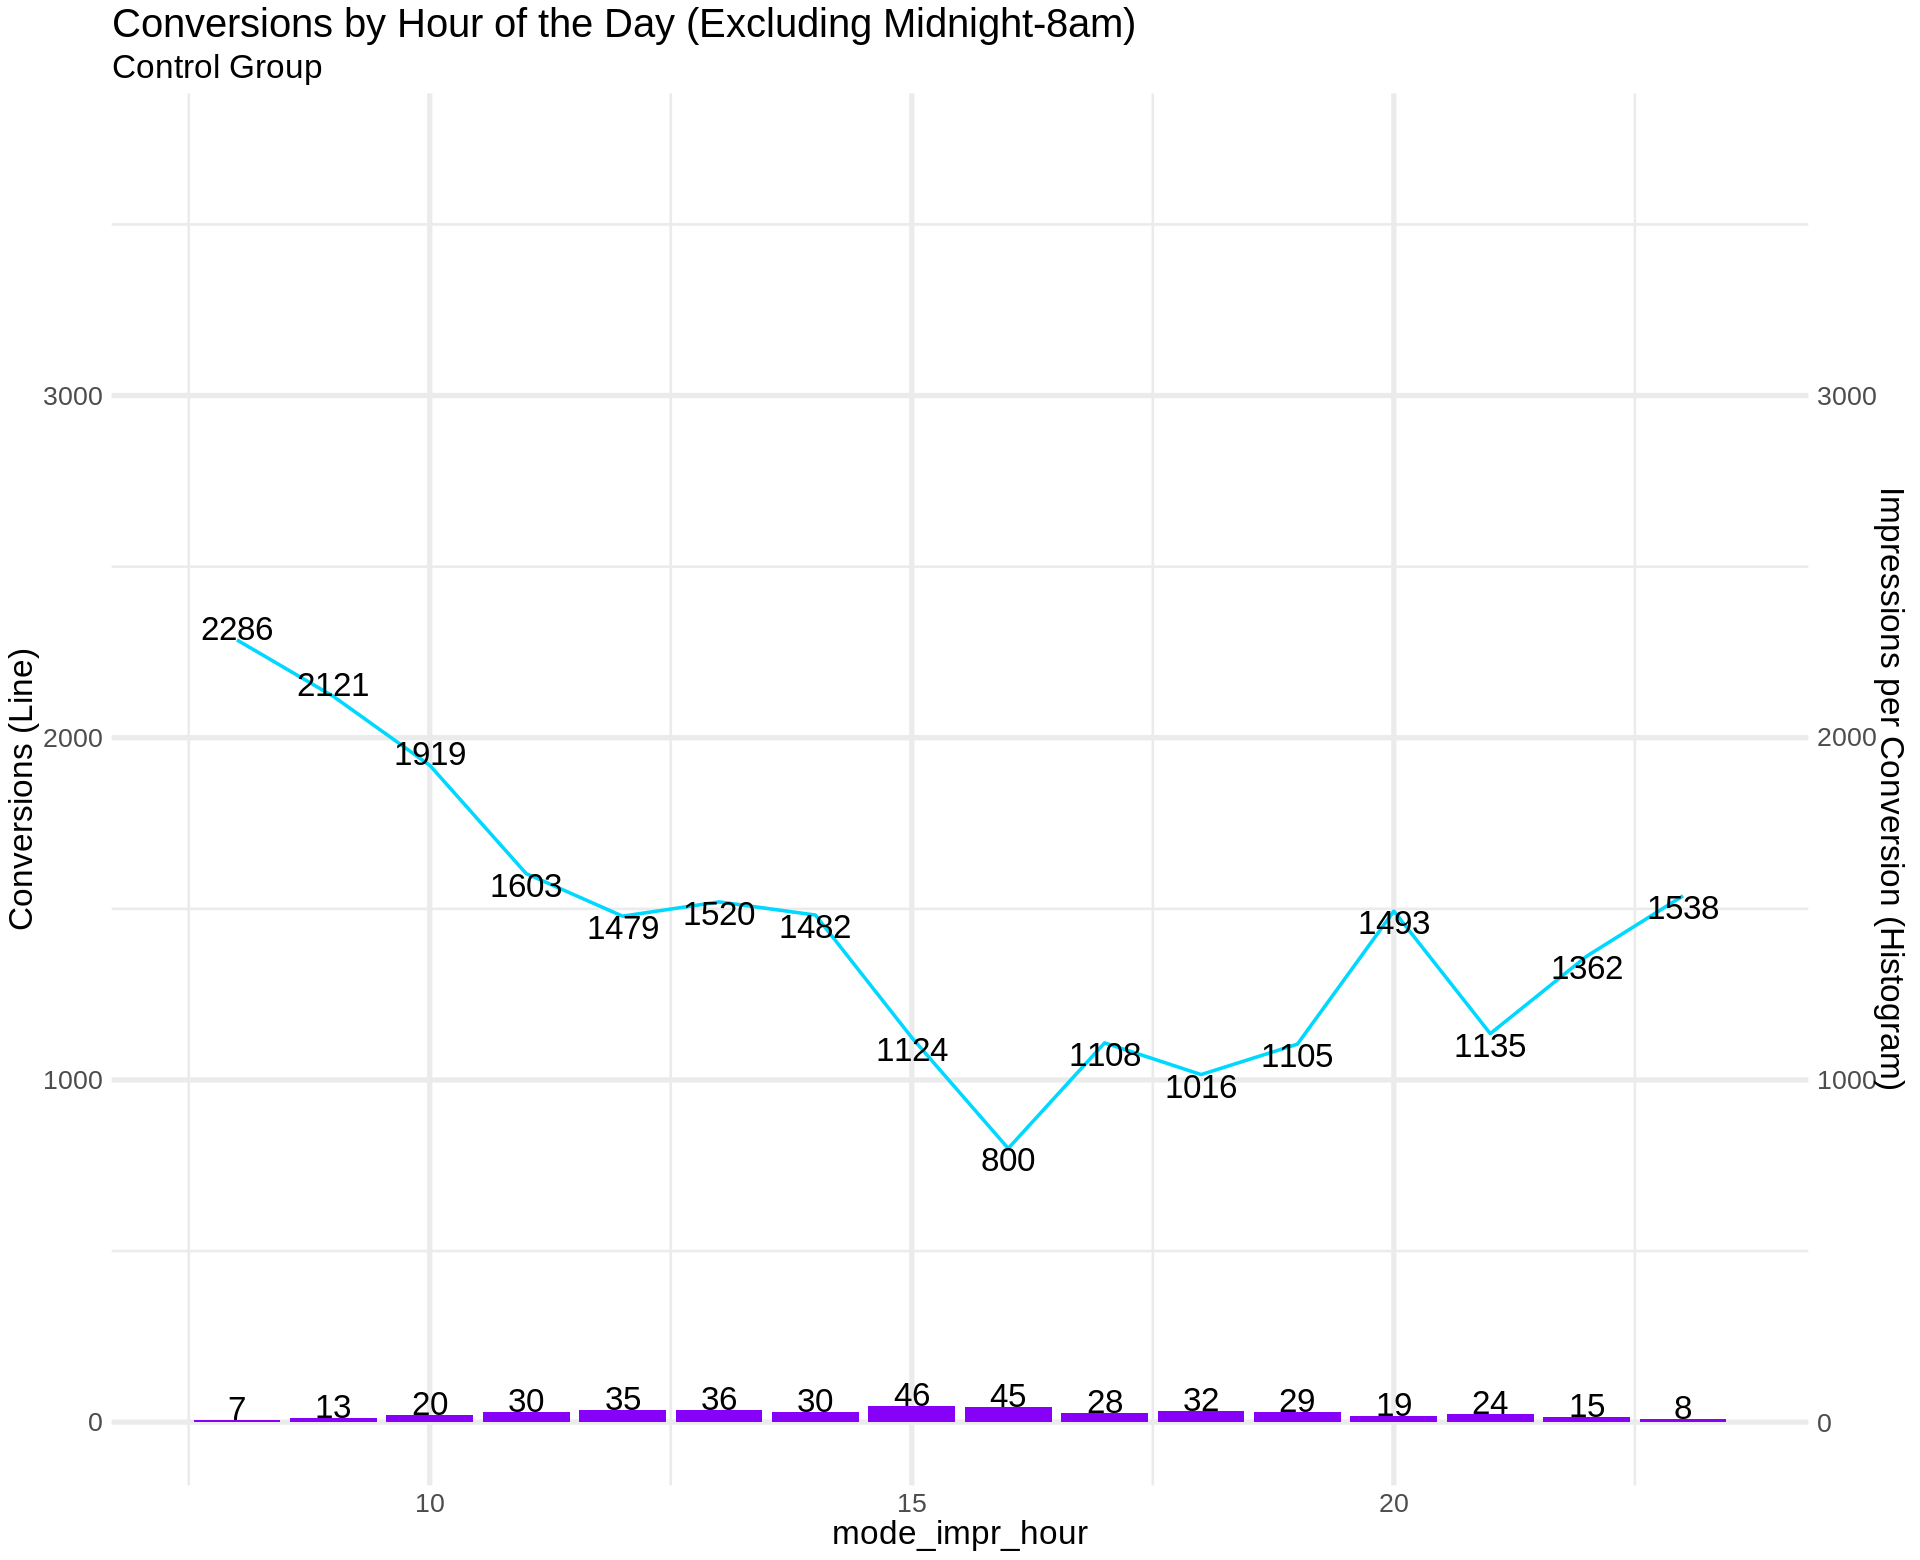

In [44]:
# Plot of Conversions x Impressions per Conversion by Control Group by Hour of Day (Excluding Midnight-8am)
ggplot(control_time_df) +
  aes(x = mode_impr_hour, weight = Conversions) +
  geom_bar(fill = "#8700F7") +
  geom_text(aes(y = Conversions, label = Conversions), vjust = "inward",size=7) +
  geom_line(aes(x = mode_impr_hour, y = Impressions_by_conversions), size = 1, color = "#00D8FF", group = 1) +
  scale_y_continuous(name = "Conversions (Line)", sec.axis = sec_axis(~ . * 1, name = "Impressions per Conversion (Histogram)")) +
  geom_text(aes(y = Impressions_by_conversions, label = round(Impressions_by_conversions)), vjust = "outward",size=7) +
  labs(title = "Conversions by Hour of the Day (Excluding Midnight-8am)", subtitle = "Control Group") +
  theme_minimal()+ xlim(7.5L, 23.5L) + theme(text = element_text(size = 20), element_line(size = 1.5)) 


Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_text).”


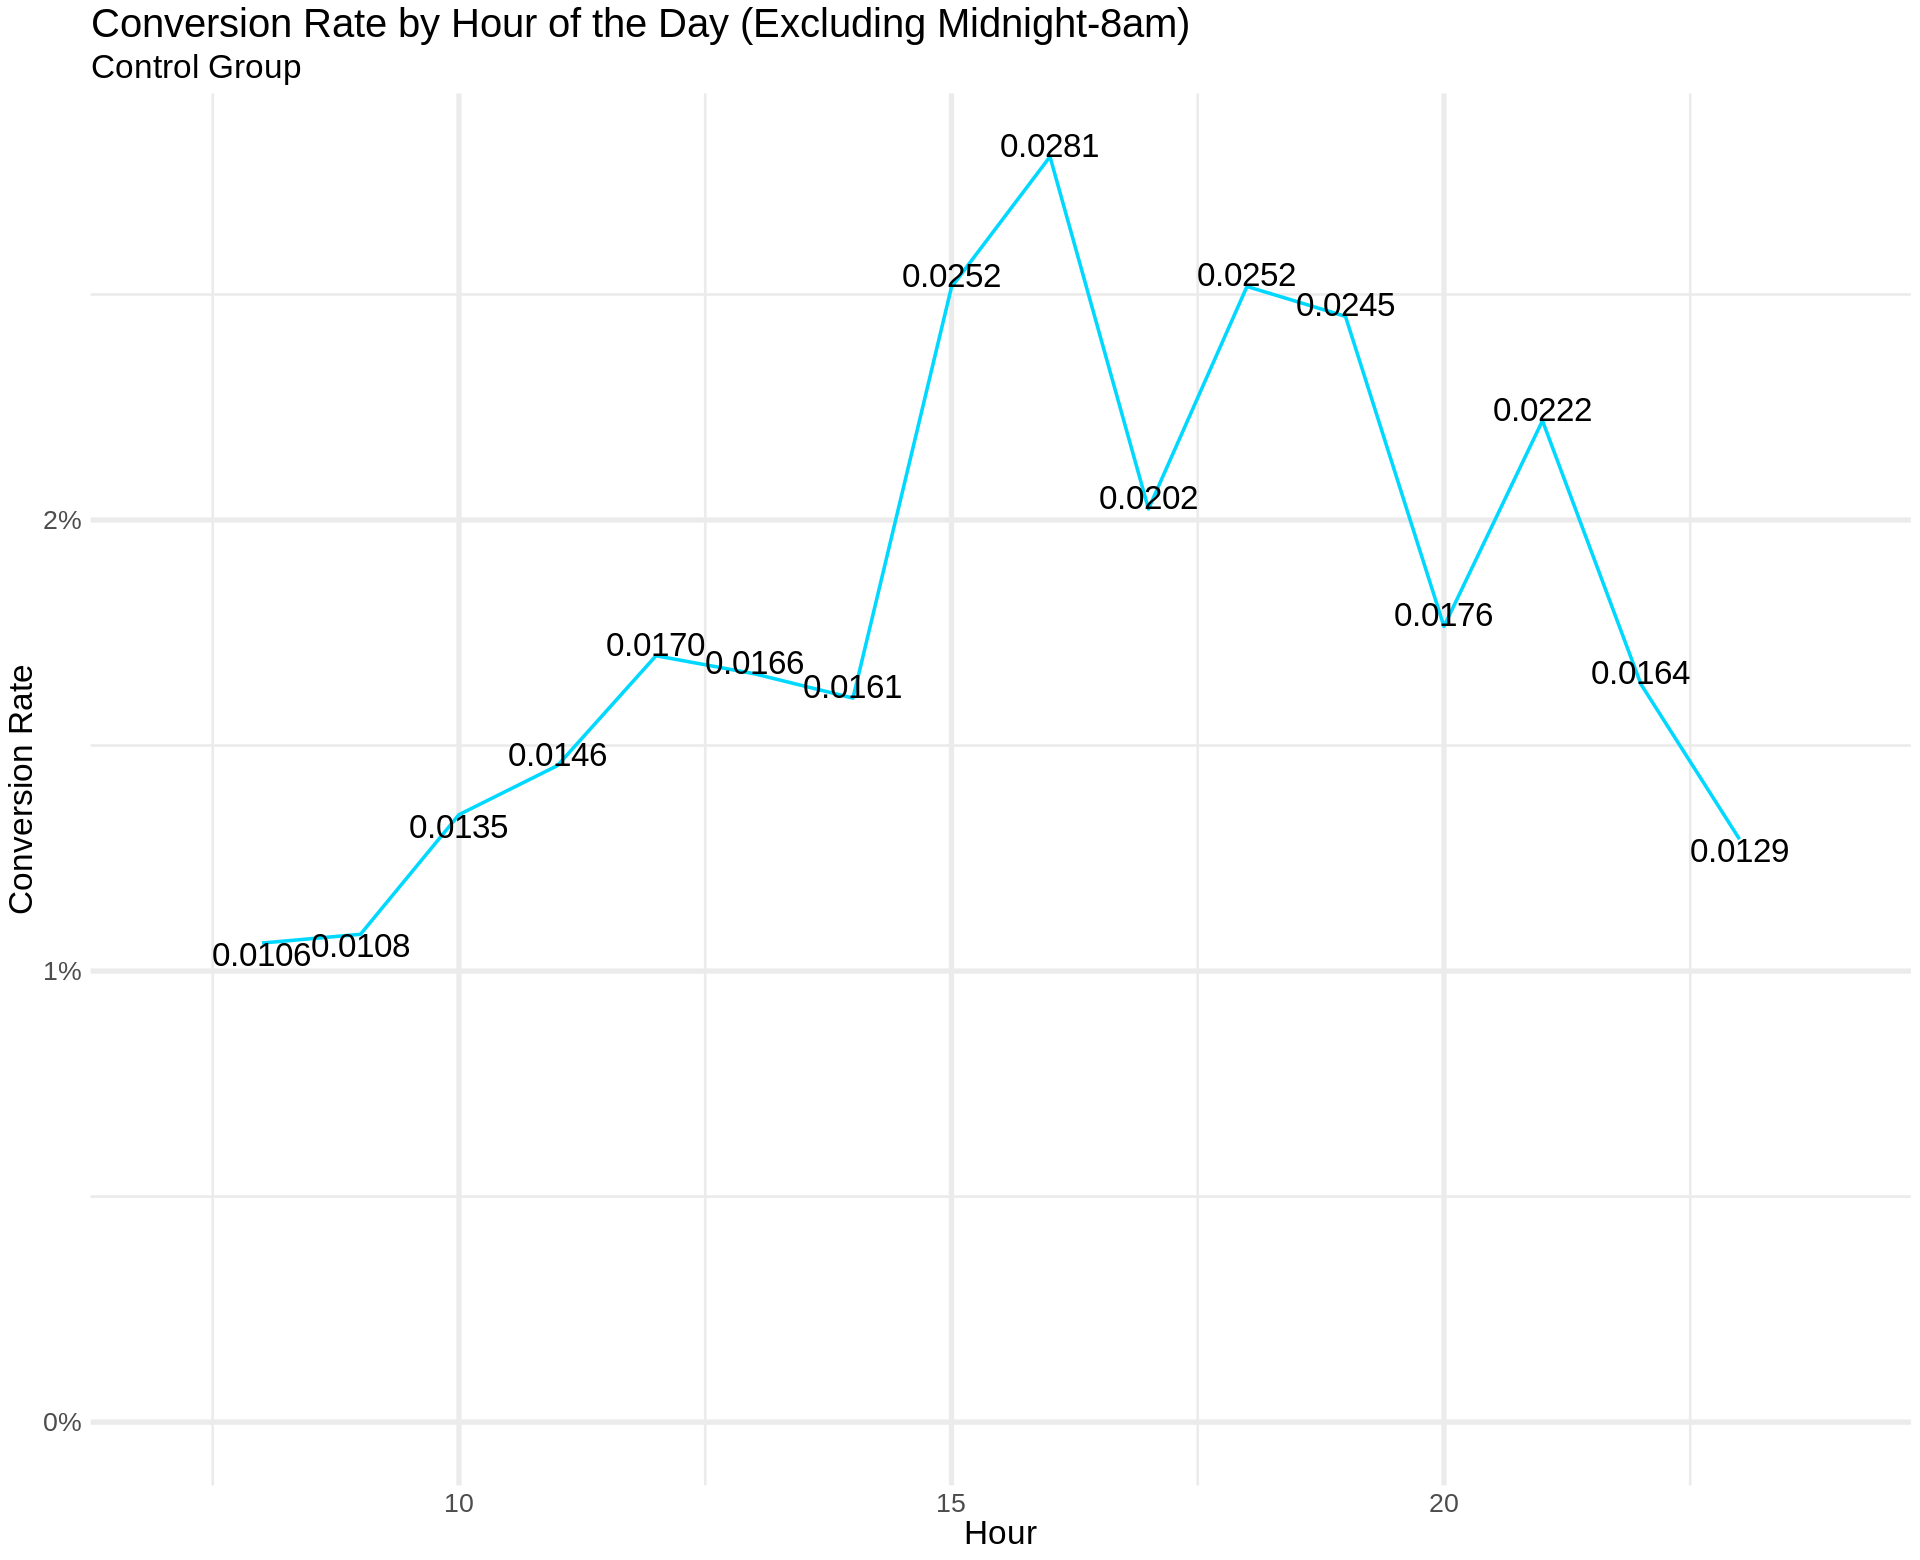

In [45]:
# Plot of Conversion rates by Control Group by Hour of Day (Excluding Midnight-8am)

ggplot(control_time_df) +
  aes(x = mode_impr_hour, y = ConversionRate) +
  geom_line(size = 1L, colour = "#00D8FF") +
  geom_text(aes(x = mode_impr_hour, y = ConversionRate, label = format(ConversionRate, digits = 2, format = "f")), vjust = "outward",size=7) +
  labs(x = "Hour", y = "Conversion Rate", title = "Conversion Rate by Hour of the Day (Excluding Midnight-8am)", subtitle = "Control Group") +
  theme_minimal()+ xlim(7.1L, 23.9L) + scale_y_continuous(labels=scales::percent) + theme(text = element_text(size = 20), element_line(size = 1.5)) 


# Conclusion



#### In conclusion, consumer response to advertising varied on different days of the week and at different times based on several factors. Seen in the analysis above, consumer response to advertising seems heightened at the beginning the week versus towards the weekend. This may indicate that consumers are likely to spend more on Bella TK merchandise at the beginning of the week, as an early reward to get them through the work week versus near the weekend, when consumers may be planning to spend on their weekend activities. In addition, both groups performed the worst on Saturday, suggesting that Saturday may be a less optimal time to advertise.

#### As for hourly performance, the treatment group saw a sustained effect in the conversion rate throughout the hours of a day when advertising was shown. In contrast, the control group, that saw no advertising, had a less consistent and more sporadic conversion rate throughout the hours in a day. 

#### For further analysis, the relationship between how effective advertising is at lifting conversion rates could be further applied to viewing the differences in hourly conversion rates by various days. This could then help Bella TK in effectively using advertising at the beginning of the week and at the times it makes most sense to do so. 

#### From the analysis above, it’s clear that any advertising Bella TK implements will aid it in achieving more conversions, especially during the beginning of the week, and in the afternoon/late evening. To add to this analysis, Bella TK should expand its marketing to target more unique users, within the identified high conversion range of up to 200 impressions. By optimizing their advertising to target unique users who have yet to see 200 impressions, they could thereby increase their sales across a broader demographic, then simply relying on inundating the same users repeatedly (i.e. once a user reaches 200 impressions, leave that user out of further targeting for that campaign).